# Project Introduction

***Project Overview***

*Project* ini membahas tentang penerapan algoritma Unsupervised Learning, yaitu **Clustering**. Clustering adalah tugas mengelompokkan sekumpulan objek sedemikian rupa sehingga objek dalam klaster yang sama lebih mirip satu sama lain daripada objek di klaster lain. Metode Clustering yang akan digunakan adalah Principal Component Analysis (PCA) dan K-Means Clustering. PCA digunakan untuk mereduksi dimensi data yang diharapkan dapat memudahkan untuk melakukan interpretasi data dan pengelompokkan dalam klaster. Data yang digunakan dalam analisis klaster ini adalah data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut dan 8950 baris yang dapat diakses [di sini](https://www.kaggle.com/arjunbhasin2013/ccdata). Objektif dari *project* ini adalah mengelompokkan pengguna kartu kredit berdasarkan kebiasaan transaksi (*transaction behaviour*) yang dijalankannya ke dalam beberapa klaster.

***Attribute Information:***
1. `CUSTID` - Identification of Credit Card holder (Categorical)
2. `BALANCE` - Balance amount left in their account to make purchases 
3. `BALANCEFREQUENCY` - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. `PURCHASES` - Amount of purchases made from account
5. `ONEOFFPURCHASES` - Maximum purchase amount done in one-go
6. `INSTALLMENTSPURCHASES` - Amount of purchase done in installment
7. `CASHADVANCE` - Cash in advance given by the user
8. `PURCHASESFREQUENCY` - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. `ONEOFFPURCHASESFREQUENCY` - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. `PURCHASESINSTALLMENTSFREQUENCY` - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. `CASHADVANCEFREQUENCY` - How frequently the cash in advance being paid
12. `CASHADVANCETRX` - Number of Transactions made with "Cash in Advance"
13. `PURCHASESTRX` - Number of purchase transactions made
14. `CREDITLIMIT` - Limit of Credit Card for user
15. `PAYMENTS` - Amount of Payment done by user
16. `MINIMUM_PAYMENTS` - Minimum amount of payments made by user
17. `PRCFULLPAYMENT` - Percent of full payment paid by user
18. `TENURE` - Tenure of credit card service for user

**Sumber:**

https://www.kaggle.com/arjunbhasin2013/ccdata

https://www.kode.id/courses/take/introduction-to-python-for-data-science-km/texts/25596530-unsupervised

https://www.kaggle.com/aathikm/cc-general-clustering-eda

https://www.kaggle.com/twaritshah/credit-card-customer-segmentation-pca-kmeans

https://www.kaggle.com/rakshithanil/advancedclustering-k-means-dbscan-som-eda

https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca/notebook

https://www.kaggle.com/shanan93/k-means-clustering-pca-auto-encoders#FIND-THE-OPTIMAL-NUMBER-OF-CLUSTERS-USING-ELBOW-METHOD

https://www.kaggle.com/vikasbhadoria/beautiful-segmentations-kmeans-pca-autoencoders#TASK-#6:-APPLY-K-MEANS-METHOD

# Import Pustaka yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
transaction_data = pd.read_csv("dataset/CC GENERAL.csv")

In [3]:
df = transaction_data.copy()

In [4]:
# 5 data pertama
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# 5 data terakhir
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
# Memeriksa dimensi dari dataset (jumlah baris, jumlah kolom)
df.shape

(8950, 18)

In [7]:
# Ringkasan dataset (tipe masing-masing kolom pada data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Berdasarkan keterangan di atas, diketahui bahwa dataset ini terdiri dari 8950 baris dan 18 kolom. Terdapat 14 kolom yang memiliki tipe *float*, 3 kolom dengan tipe *integer*, dan 1 kolom dengan tipe *object*.

# Data Cleaning

Bagian ini berisi proses penyiapan data berupa *data cleaning* sebelum dilakukan eksplorasi data lebih lanjut. Proses ini bertujuan untuk melihat apakah dalam data terdapat nilai yang hilang atau *missing values*, nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi dalam keseluruhan data.

In [8]:
# Memeriksa apakah ada duplikasi dalam data
df.duplicated().sum()

0

In [9]:
# Memeriksa apakah terdapat missing values setiap kolom pada data
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Berdasarkan hasil di atas, tidak terdapat duplikasi dalam dataset, namun terlihat bahwa terdapat nilai yang hilang pada data ada pada variabel `CREDIT_LIMIT` sebanyak 1 dan `MINIMUM_PAYMENTS` sebanyak 313.

In [10]:
# Drop kolom CUST_ID
df.drop('CUST_ID', axis=1, inplace=True)

In [11]:
# Memeriksa persentase missing values
(df.isnull().sum()/len(df))*100

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Untuk mengatasi *missing values* pada kolom `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS`, akan dilakukan pengecekan distribusi data pada kedua kolom ini.

In [12]:
# Histogram dan boxplot kolom CREDIT_LIMIT & MINIMUM_PAYMENTS

fig = plt.figure(figsize=(10,7))

ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

df['CREDIT_LIMIT'].plot(kind='hist', ax=ax0)
df['CREDIT_LIMIT'].plot(kind='box', ax=ax1)
df['MINIMUM_PAYMENTS'].plot(kind='hist', ax=ax2)
df['MINIMUM_PAYMENTS'].plot(kind='box', ax=ax3)

<AxesSubplot:>

Karena kolom `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS` memiliki banyak *outlier* atau pecilan dan *skewed*, maka *missing values* akan diisi dengan nilai median.

In [13]:
# Mengisi missing values dengan median
df["CREDIT_LIMIT"].fillna(value=df["CREDIT_LIMIT"].median(), inplace=True)
df["MINIMUM_PAYMENTS"].fillna(value=df["MINIMUM_PAYMENTS"].median(), inplace=True)

In [14]:
# Memeriksa kembali apakah masih terdapat missing values pada masing-masing kolom
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Ekplorasi Data

Selanjutnya eksplorasi data dilakukan untuk memahami data lebih dalam dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan pengelompokkan klaster kumpulan data.

## Statistik deskriptif masing-masing kolom

In [15]:
# Melihat rangkuman statistik
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Berdasarkan rangkuman nilai statistik di atas, dapat diketahui bahwa terdapat *outlier* pada masing-masing kolom. Namun, penghapusan nilai *outlier* akan berpengaruh pada hasil pengelompokkan nantinya, maka akan dilakukan transformasi data pada tahap *Preprocessing*.

## Distribusi statistik masing-masing kolom

In [16]:
# Membuat fungsi untuk memunculkan histogram dan boxplot masing-masing kolom
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name}')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution')
    
    plt.subplot(1, 3, 3)
    feature.plot(kind = 'box')
    plt.title(f'{feature.name}')
    plt.show()

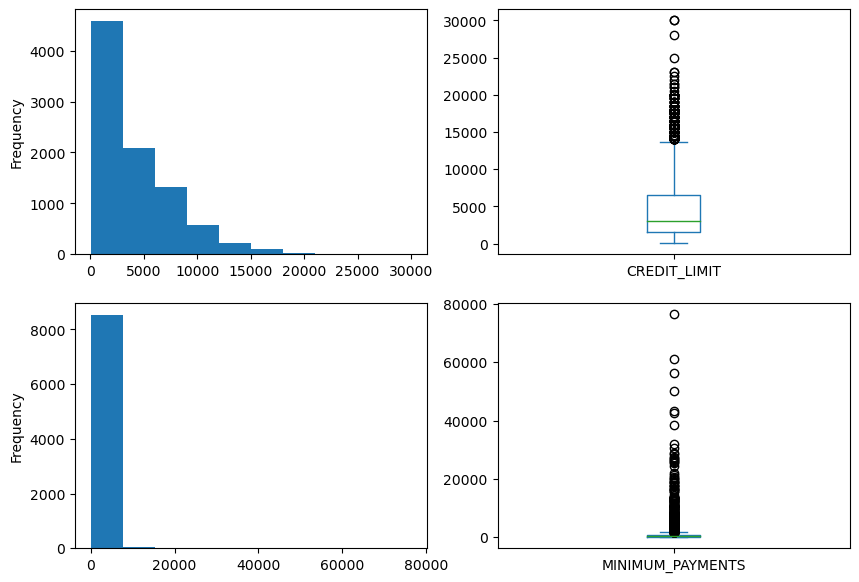

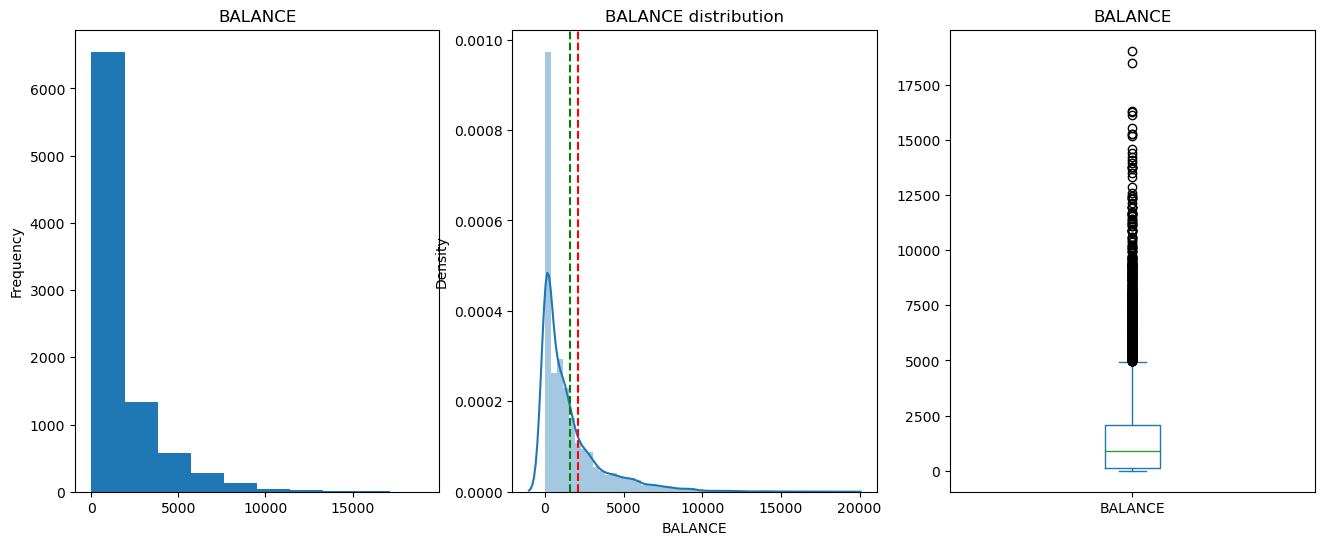

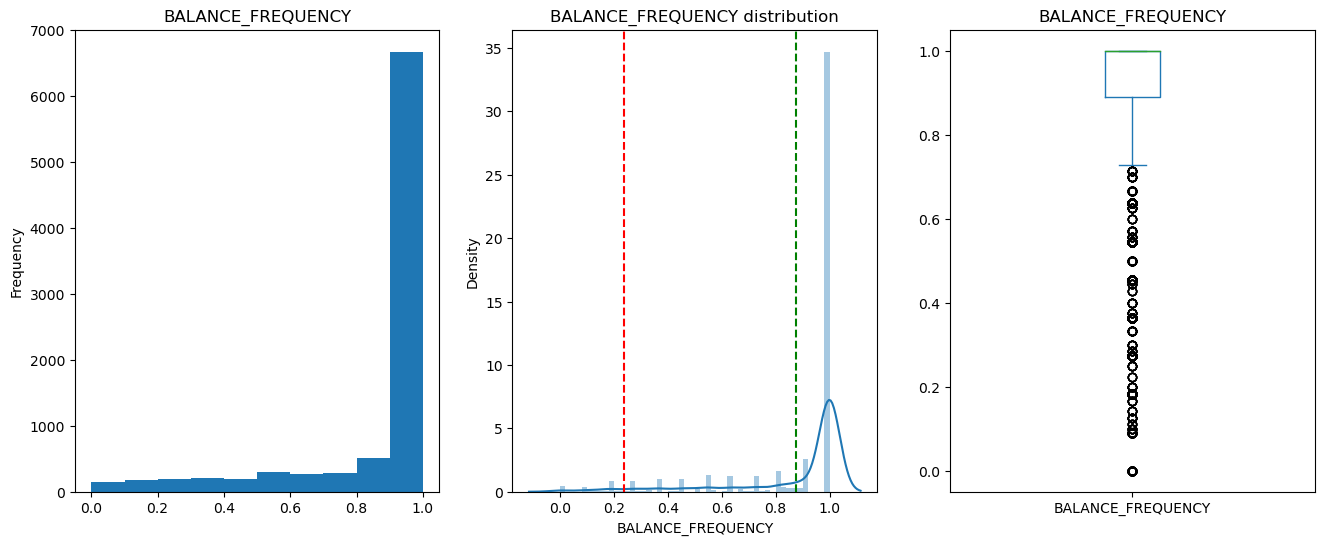

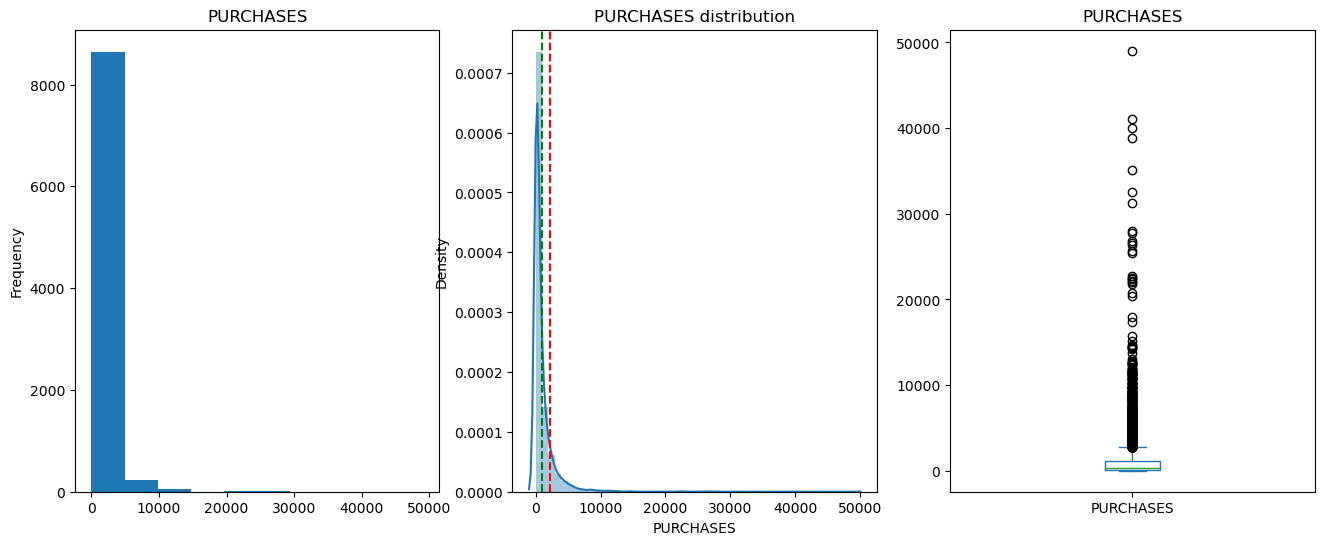

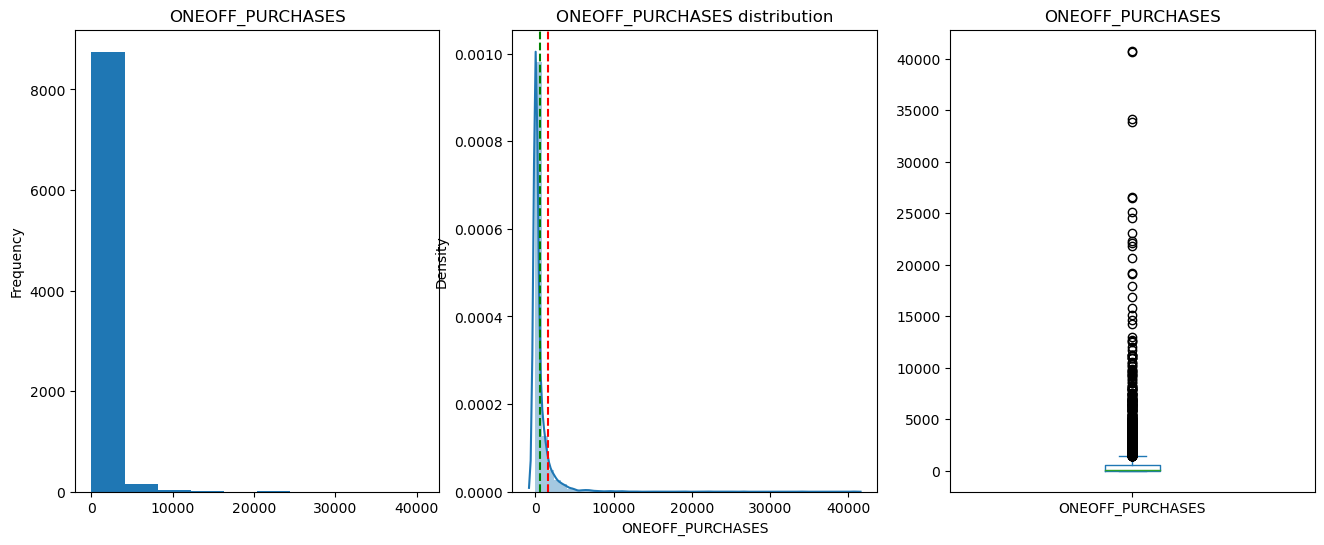

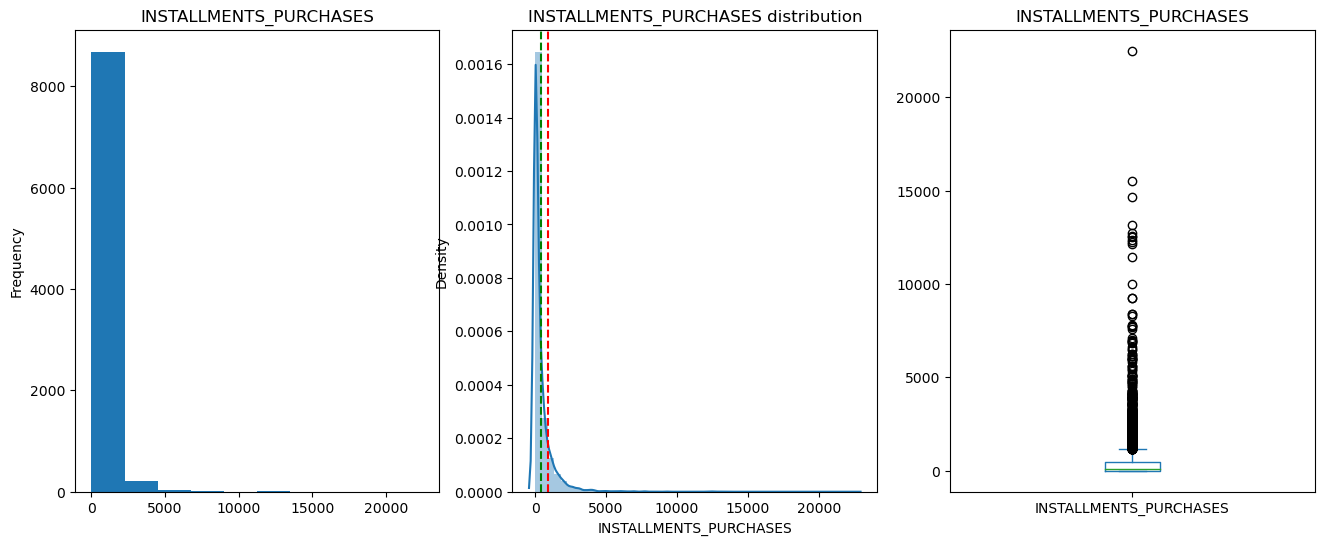

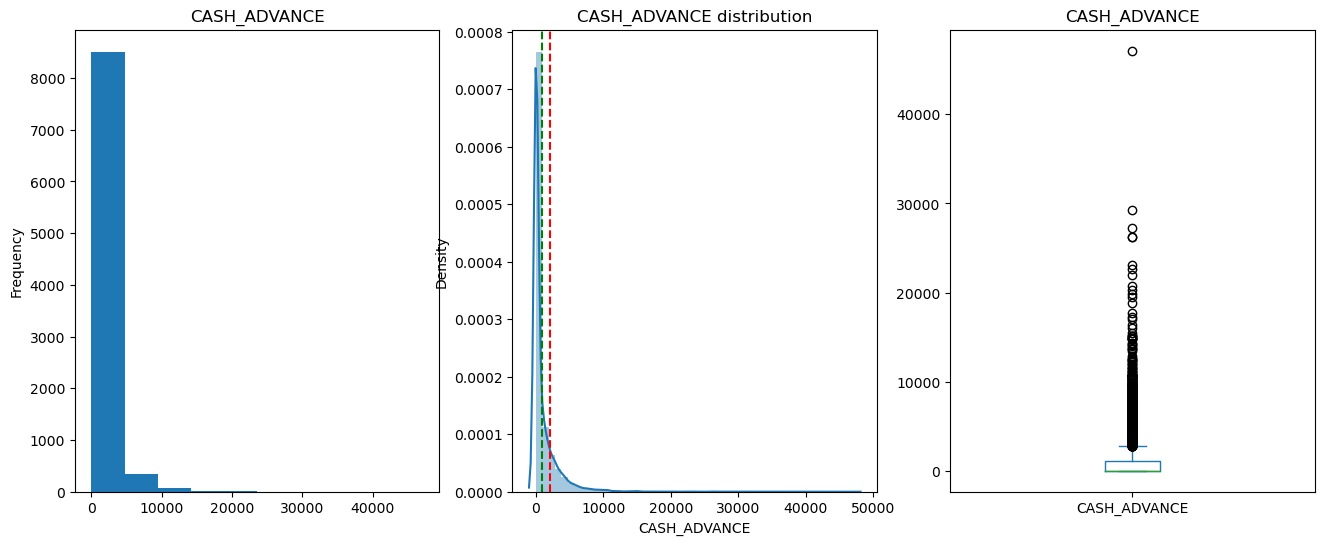

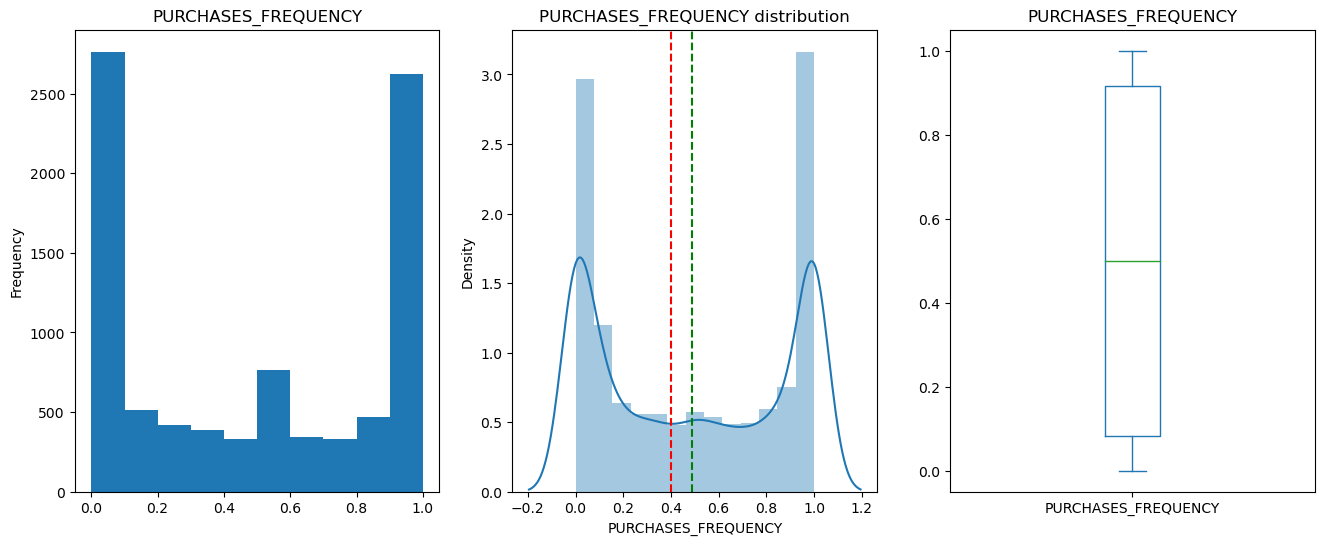

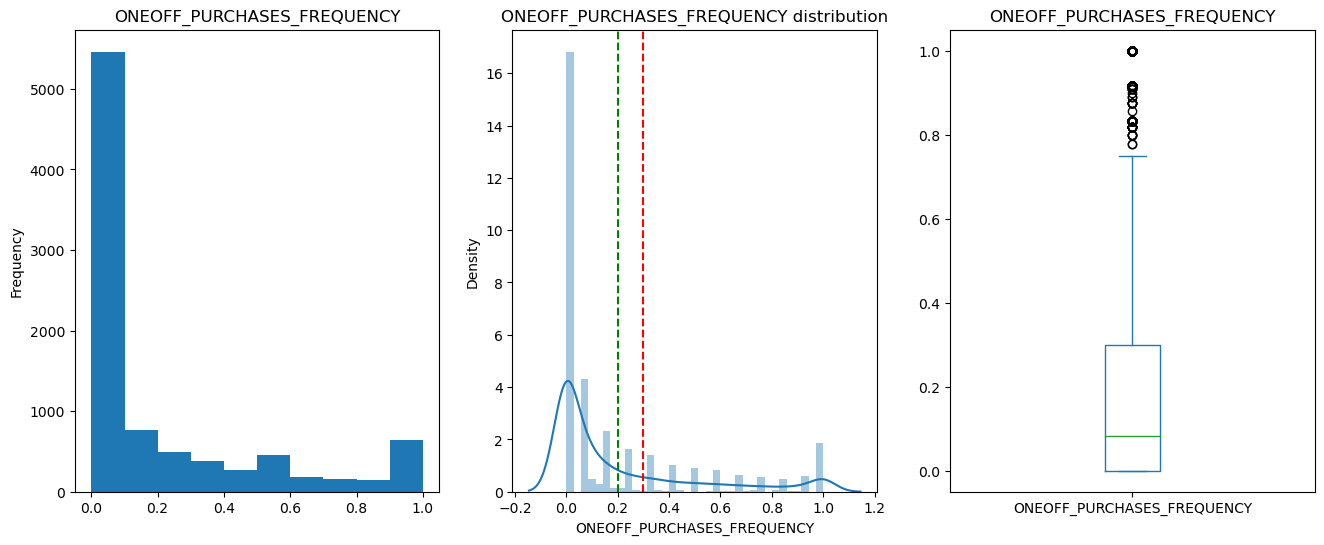

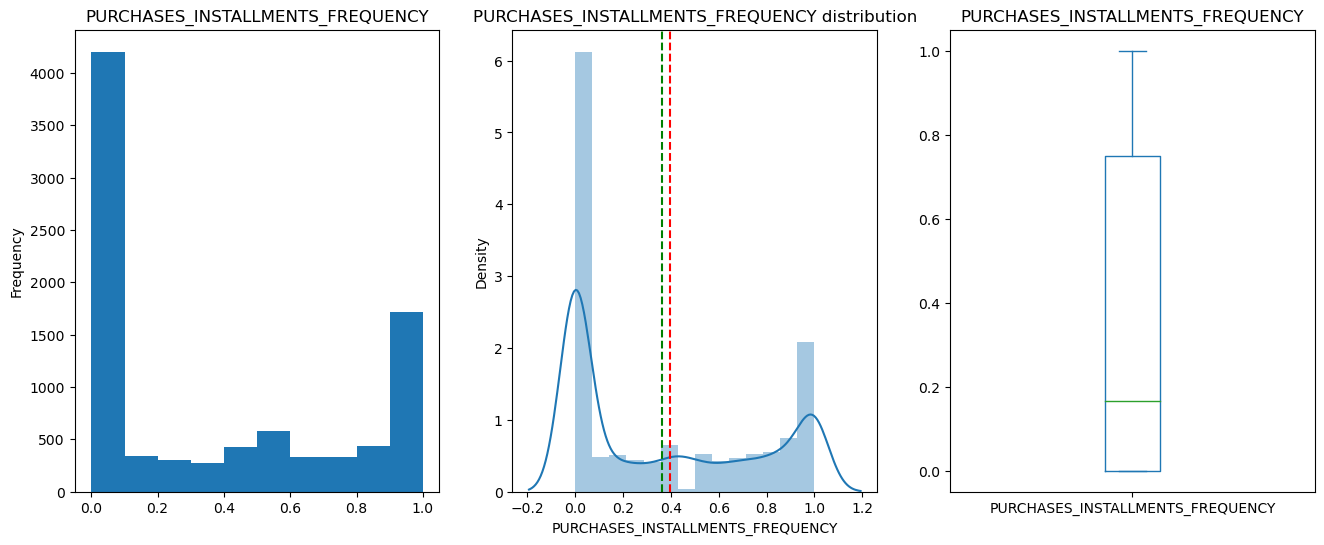

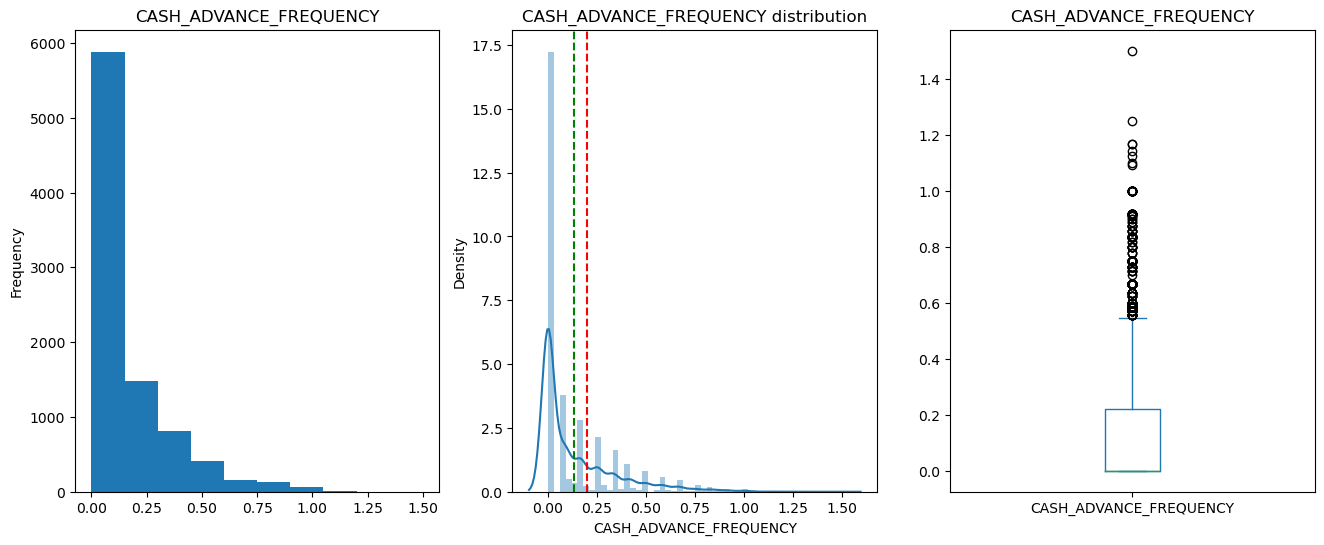

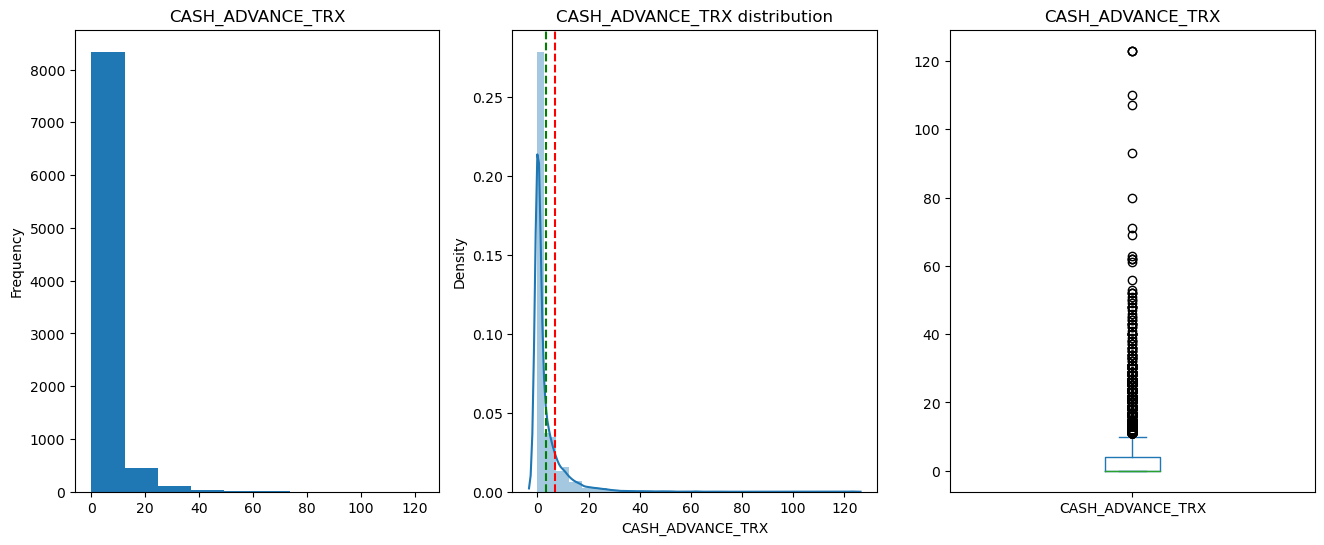

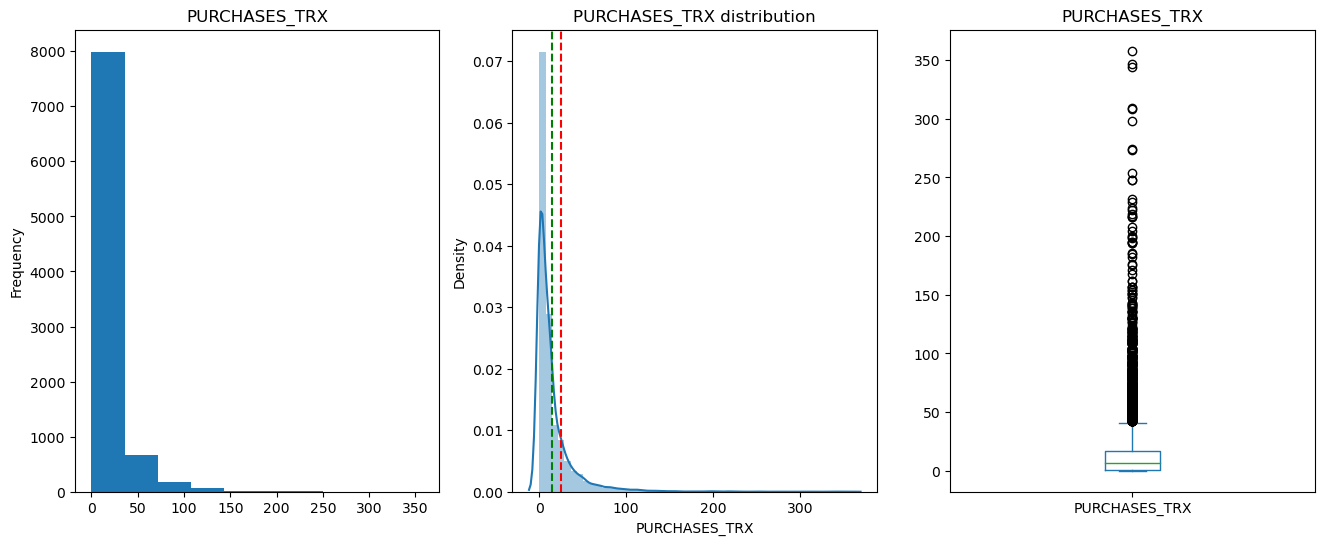

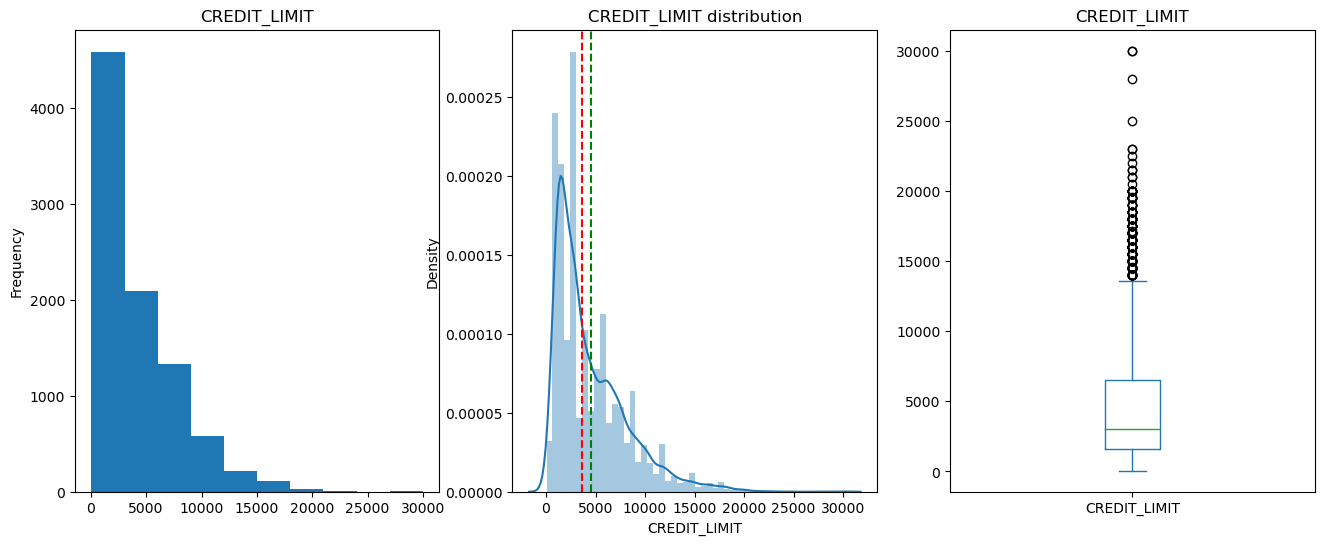

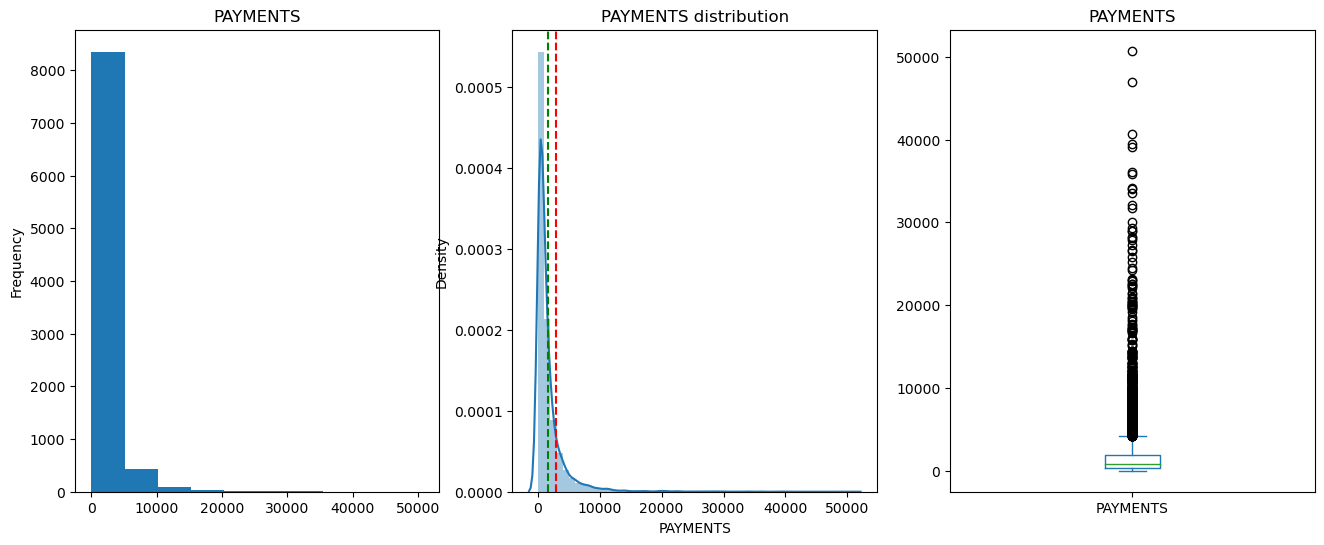

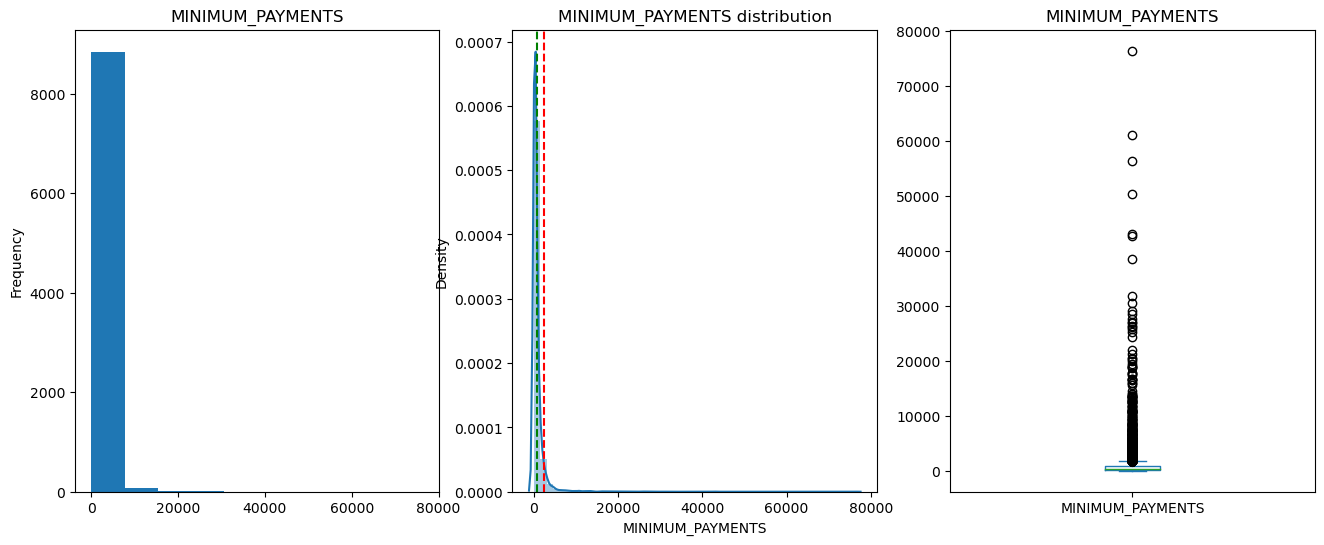

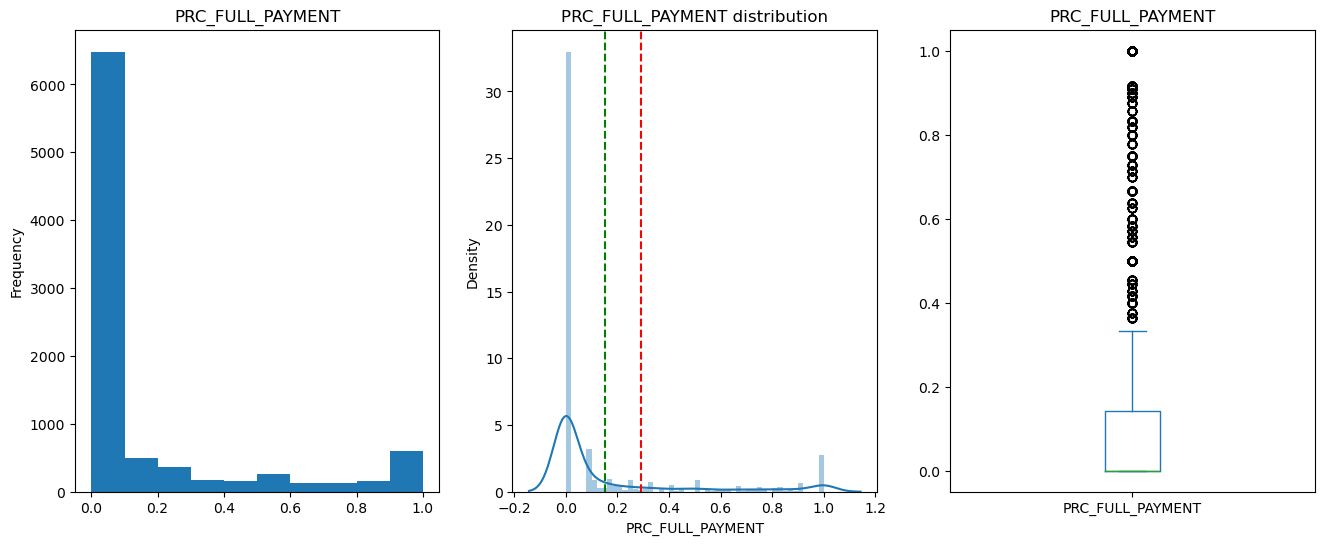

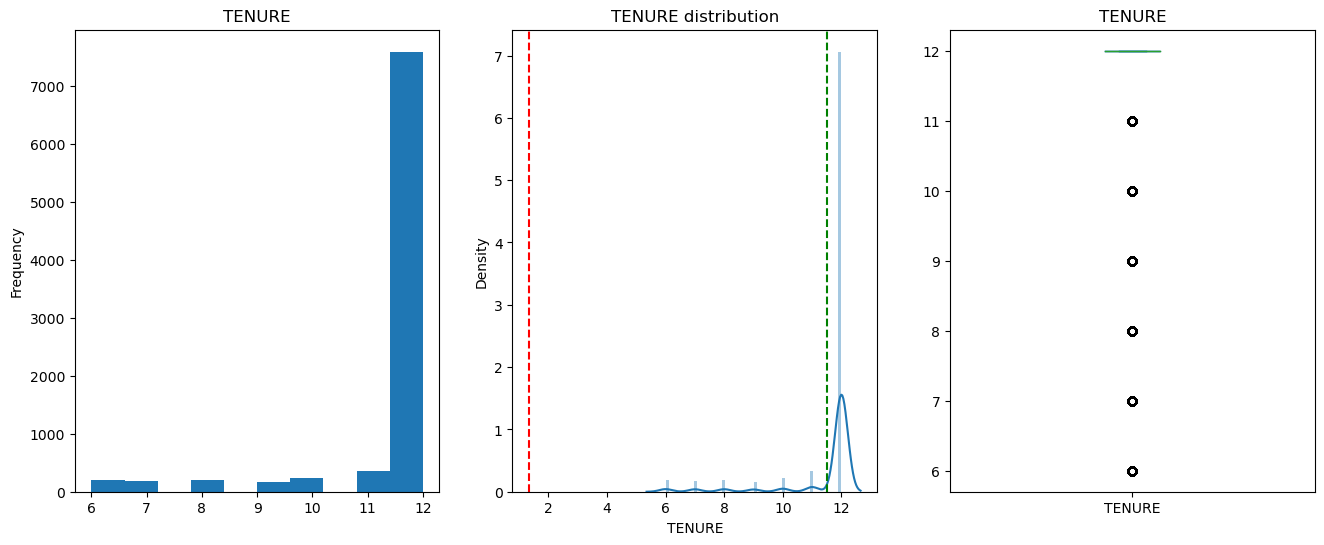

In [17]:
# Memunculkan plot masing-masing kolom numerik. Kolom kategorik tidak disertakan
num_feature = df.select_dtypes(exclude='object')

for i in num_feature.columns:
    feat_plot(num_feature[i])

Berdasarkan plot distribusi dan nilai statistik deskriptif di atas, dapat diketahui bahwa selama 6 bulan penggunaan kartu kredit:
1. Pengguna kartu kredit kebanyakan memiliki saldo di bawah 2500 dengan saldo rata-rata sekitar 1500. Selain itu, saldo pengguna kartu kredit juga sering diperbarui (ditunjukkan oleh angka 1 dengan frekuensi tertinggi) ini berarti pengguna kartu kredit sering memperbarui saldo dalam kartu kredit.
2. Pengguna kartu kredit kebanyakan melakukan transaksi pembelian menggunakan kartu kredit dengan nominal di bawah 5000 dengan rata-rata nominal transaksi di sekitar 1000. Selain itu, kebanyakan pengguna melakukan transaksi dengan nominal terbanyak dalam satu kali transaksi adalah di bawah 1000. Pengguna juga kebanyakan melakukan pembelian angsuran menggunakan kartu kredit dengan nominal di bawah 5000. Ini diduga karena jumlah saldo yang kecil, maka diikuti dengan transaksi pembelian yang kecil pula.
3. Pengguna kartu kredit tidak cukup sering melakukan transaksi pembelian menggunakan kartu kredit, baik itu dalam satu kali transaksi maupun angsuran (ditunjukkan oleh plot `PURCHASE_FREQUENCY`, `ONEOFF_PURCHASE_FREQUENCY`, dan `PURCHASES_INSTALLMENTS FREQUENCY`).
4. Pengguna kebanyakan memiliki limit kredit di bawah 5000 dengan rata-rata 4494 dan nilai tengah 3638.
5. Pembayaran yang dilakukan pembeli kebanyakan juga di bawah nominal 5000.
6. Untuk menggunakan kartu kredit, kebanyakan pembeli harus melakukan pembayaran minimal senilai 300 (dilihat dari nilai median kolom `MINIMUM_PAYMENTS`).
7. Pengguna kartu kredit kebanyakan telah melakukan pembayaran 20% dari nilai pembayaran penuhnya.
8. Pengguna memiliki waktu masa pemilikan kartu kredit kebanyakan berkisar di antara 10-12 bulan.

## Korelasi antar kolom

In [18]:
# Memeriksa koefisien korelasi antar kolom
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


In [19]:
# Memeriksa korelasi menggunakan heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="PuRd")

Berdasarkan *heatmap* plot di atas, dapat diketahui bahwa:
1. Saldo (`BALANCE`) berkorelasi positif dengan uang panjar (`CASH_ADVANCE`) (atau uang muka yang diberikan oleh pengguna) dan limit kredit (`CREDIT_LIMIT`). Ini berarti limit kredit dan uang yang diberikan oleh pengguna, maka semakin banyak saldonya.
2. Transaksi pembelian (`PURCHASES`) berkorelasi positif dengan pembelian dalam satu kali transaksi (`ONEOFF_PURCHASES`) dan pembelian angsuran (`INSTALLMENTS_PURCHASES`). Dapat diartikan bahwa pengguna banyak melakukan transaksi dalam satu kali dan juga dalam bentuk cicilan/angsuran.
3. Limit kredit berkorelasi positif dengan saldo, pembelian, dan pembayaran. Artinya semakin tinggi jumlah limit kredit akan diikuti dengan semakin banyak nominal saldo, pembelian, dan pembayaran yang dilakukan pengguna.

# Data Preprocessing

Proses ini dilakukan untuk penyiapan data untuk proses pengelompokkan data.

In [20]:
data = df.copy()

## Standarisasi data

Sebelumnya telah diketahui bahwa data memiliki banyak *outlier* dan bukan solusi yang baik untuk menghilangkan *outlier* tersebut, sehingga data akan dilakukan standarisasi menggunakan StandardScaler.

In [21]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_scaled = pd.DataFrame(scaled_features,columns = df.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## Menentukan jumlah klaster optimal menggunakan metode Elbow

Metode kurva Elbow digunakan untuk menentukan jumlah klaster optimal. Jika nilai klaster pertama dengan nilai cluster kedua memberikan sudut dalam grafik atau nilainya mengalami penurunan paling besar, maka klaster dua merupakan jumlah klaster yang optimal.

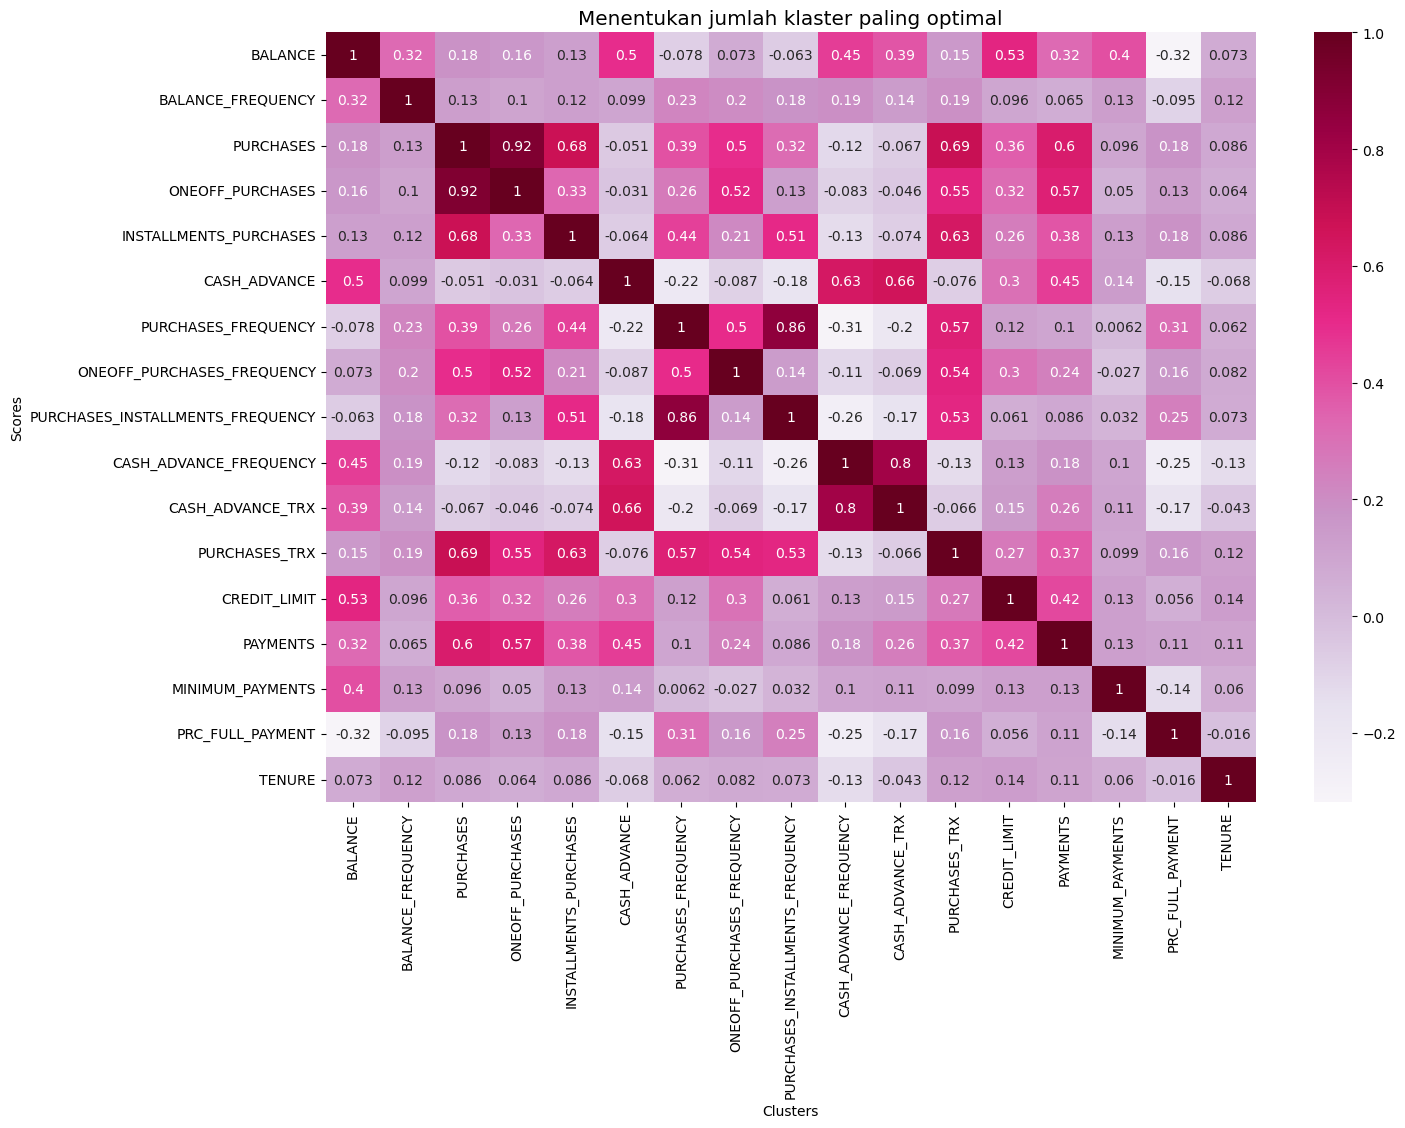

In [22]:
# Membuat plot kurva Elbow
scores_1 = []

range_values = range(1,10)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Menentukan jumlah klaster paling optimal')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

Berdasarkan plot di atas, dapat dilihat secara grafis bahwa klaster berjumlah 5 adalah yang paling optimal.

# Pendefinisian Model

In [23]:
X = data_scaled.copy()

In [24]:
# Mendefinisikan model kmeans dengan jumlah klaster sebanyak 5
kmeans= KMeans(n_clusters=5, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)

# Pelatihan Model

In [25]:
# Fitting data scaled dengan model K-means
kmeans.fit(X)
labels= kmeans.labels_

In [26]:
kmeans.cluster_centers_.shape
# Terdapat 5 klaster berdasarkan 17 kolom

(5, 17)

# Evaluasi Model

## Interpretasi karakteristik masing-masing klaster

In [27]:
# Rata-rata nilai masing-masing kolom berdasarkan klasternya
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_,columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.410980,0.414656,7.077361,6.236596,5.273896,0.035821,1.087025,1.891663,1.045609,-0.248755,-0.045397,4.740816,2.161434,4.882121,1.095410,0.830765,0.333341
1,-0.244020,-0.337410,-0.339177,-0.220916,-0.395981,-0.169727,-0.815008,-0.353515,-0.752209,-0.079573,-0.150663,-0.473144,-0.315485,-0.251310,-0.122502,-0.285304,-0.046681
2,-0.443149,0.104992,-0.098660,-0.256835,0.238531,-0.382117,0.910325,-0.399435,1.078858,-0.485736,-0.372451,0.075971,-0.356589,-0.276841,-0.076888,0.405584,-0.046681
3,0.165795,0.430201,0.907867,0.845341,0.593517,-0.294458,1.081405,1.775438,0.562318,-0.382419,-0.304251,1.165598,0.687888,0.368779,-0.001721,0.381406,0.274191
4,1.469814,0.382140,-0.240987,-0.176098,-0.246378,1.744894,-0.521490,-0.240365,-0.458119,1.782009,1.676842,-0.296379,0.842885,0.647527,0.506027,-0.401879,-0.098910


In [28]:
# Invers data yang telah distandarisasi untuk lebih memahami karaktersitik klaster
cluster_centers_inversed = scaler.inverse_transform(cluster_centers)
cluster_centers_inversed = pd.DataFrame(data = cluster_centers_inversed,columns = [df.columns])
cluster_centers_inversed

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4501.309782,0.975499,16124.096585,10943.910122,5180.186463,1053.988646,0.926626,0.766778,0.779989,0.085366,2.939024,132.548780,12358.536585,15866.407213,3400.127002,0.396699,11.963415
1,1056.568555,0.797341,278.547543,225.762342,52.987161,622.945569,0.163248,0.096997,0.065490,0.119221,2.220663,2.949235,3346.408163,1005.627251,559.150245,0.070268,11.454847
2,642.097197,0.902142,792.417208,166.143513,626.768012,177.553587,0.855708,0.083299,0.793203,0.037943,0.707125,16.598177,3196.854314,931.715132,665.552147,0.272341,11.454847
3,1909.563100,0.979181,2942.876319,1995.530403,947.777261,361.379626,0.924371,0.732105,0.587917,0.058618,1.172538,43.682243,6997.122410,2800.722898,840.891382,0.265269,11.884256
4,4623.769609,0.967796,488.333220,300.150682,188.271487,4637.995920,0.281052,0.130752,0.182369,0.491742,14.692038,7.342957,7561.071343,3607.670498,2025.296055,0.036172,11.384952


In [29]:
# Membuat kolom keterangan klaster pada dataframe
df_clusters = pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [30]:
# Interpretasi klaster yang terbentuk
for c in df_clusters:
    grid= sns.FacetGrid(df_clusters, col='cluster')
    grid.map(plt.hist, c)

Berdasarkan pengelompokkan klaster di atas, diketahui masing-masing karakteristik dari klaster yang ada, yaitu:

**- Klaster 0 (Pengguna dengan limit kredit kecil dan melakukan transaksi pembayaran dan pembelian cukup sering)**

Kelompok pengguna kartu kredit yang memiliki saldo kecil (di bawah 1000), namun melakukan transaksi pembelian dan pembayaran dengan rata-rata nominal yang cukup tinggi. Limit kredit yang dimiliki paling rendah dibanding klaster lain. Persentase pembayaran penuh sebesar 27% dan frekuensi transaksi yang dilakukan cukup besar dan frekuensi tarik tunai yang kecil.

**- Klaster 1 (Pengguna dengan limit kredit rata-rata dan tidak banyak melakukan transaksi maupun tarik tunai kartu kredit)**

Kelompok pengguna kartu kredit yang memiliki saldo di atas 1000 namun di bawah 1500. Kelompok pengguna ini melakukan transaksi pembelian dan pembayaran dengan rata-rata nominal yang rendah. Limit kredit yang dimiliki di bawah 3500. Persentase pembayaran penuh sebesar 7%. Frekuensi transaksi dan tarik tunai yang dilakukan rendah. Pengguna kartu kredit paling banyak masuk ke dalam kelompok ini.

**- Klaster 2 (Pengguna dengan limit kredit tinggi dan menggunakannya untuk transaksi tarik tunai)**

Kelompok pengguna kartu kredit yang memiliki saldo dengan jumlah yang paling tinggi di antara klaster lain (di atas 4500). Limit kredit yang dimiliki juga cukup tinggi yaitu di atas 7000. Frekuensi transaksi pembelian dan pembayaran yang dilakukan cukup rendah, namun frekuensi tarik tunai yang dilakukan cukup tinggi. Pengguna ini melakukan transaksi pembelian dengan nominal yang rendah, namun melakukan transaksi pembayaran dengan nominal yang cukup tinggi.

**- Klaster 3 (Pengguna dengan limit kredit paling tinggi dan sering melakukan transaksi baik itu pembelian dan pembayaran ataupun tarik tunai)**

Kelompok pengguna kartu kredit yang memiliki saldo dengan nominal rata-rata sekitar 4500. Pengguna ini melakukan transaksi pembayaran dan pembelian dengan nominal yang paling tinggi di antara klaster lain. Frekuensi transaksi pembayaran dan pembelian juga tinggi, namun transaksi tarik tunai yang dilakukan rendah. Memiliki rata-rata limit kredit tertinggi (di atas 10000). Persentase pembayaran penuh sebesar 39%.

**- Klaster 4 (Pengguna dengan limit kredit tinggi dengan saldo rata-rata dan menggunakannya untuk transaksi pembelian dan pembayaran)**

Kelompok pengguna kartu kredit yang memiliki saldo dengan nominal rata-rata di atas 1500 dan melakukan transaksi pembelian dan pembayaran dengan nominal rata-rata yang cukup tinggi (di atas 2000). Memiliki limit kredit sebesar 7000. Frekuensi transaksi pembelian dan pembayaran yang dilakukan cukup tinggi, namun frekuensi tarik tunai yang dilakukan rendah. Persentase pembayaran penuh sebesar 27%.

In [31]:
# Jumlah observasi dalam masing-masing klaster

count_cluster = df_clusters.groupby('cluster').count()
count_cluster['BALANCE']

cluster
0      82
1    3918
2    2414
3    1391
4    1145
Name: BALANCE, dtype: int64

Diketahui bahwa terdapat 2418 pengguna pada Klaster 0, 3911 pengguna pada klaster 1, 1155 pengguna pada klaster 2, 83 pengguna pada klaster 3, dan 1383 pengguna pada klaster 4.

## Principal Component Analysis (PCA) dan Visualisasi Klaster

In [32]:
# Membuat PCA  dengan jumlah kompenen sesuai jumlah kolom
pca = PCA(n_components=17)
principal_components = pca.fit_transform(X)
principal_components

array([[-1.68364879e+00, -1.07224148e+00,  4.75660084e-01, ...,
         1.49962336e-01,  4.82655442e-02, -1.60528758e-04],
       [-1.13408493e+00,  2.50914981e+00,  6.02216308e-01, ...,
        -5.32950936e-01, -8.29086834e-02,  3.07157686e-06],
       [ 9.69394988e-01, -3.83576903e-01,  9.09697616e-02, ...,
         2.21683158e-01,  5.11324941e-01,  2.23296494e-05],
       ...,
       [-9.28985122e-01, -1.80804835e+00, -4.58242377e-01, ...,
         4.60675887e-01,  1.57799814e-01, -1.63043472e-04],
       [-2.33784475e+00, -6.53611332e-01,  9.82831153e-01, ...,
         2.63789927e-01, -1.89595873e-01, -8.58602334e-05],
       [-5.58026533e-01, -4.00646098e-01,  1.03364560e+00, ...,
        -4.18806582e-01,  3.57426555e-01, -7.42947186e-05]])

In [33]:
# Membuat dataframe dari kompenen utama yang sudah dibuat
cols = ["Feature "+str(i) for i in range(principal_components.shape[1])]
df_pca_components = pd.DataFrame(data = principal_components, columns = cols)
df_pca_components.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336,-0.078196,-0.235948,-0.052497,-0.081637,-0.187992,0.149962,0.048266,-0.000161
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472,-0.777929,-0.870746,-0.607171,-0.034550,-0.733098,-0.532951,-0.082909,0.000003
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803,-0.001744,-0.762170,0.683870,0.696544,0.042389,0.221683,0.511325,0.000022
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245,0.393690,0.747670,0.119186,-0.127887,-0.417356,-0.091930,-0.016174,-0.000010
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032,-0.122073,-0.455167,-0.108719,-0.037507,-0.040989,0.290908,-0.070603,-0.000081


Sebelum menentukan n kompenen pada PCA, akan dilihat menggunakan *bar chart* berikut berapa kompenen yang mengandung sebagian besar varians data.

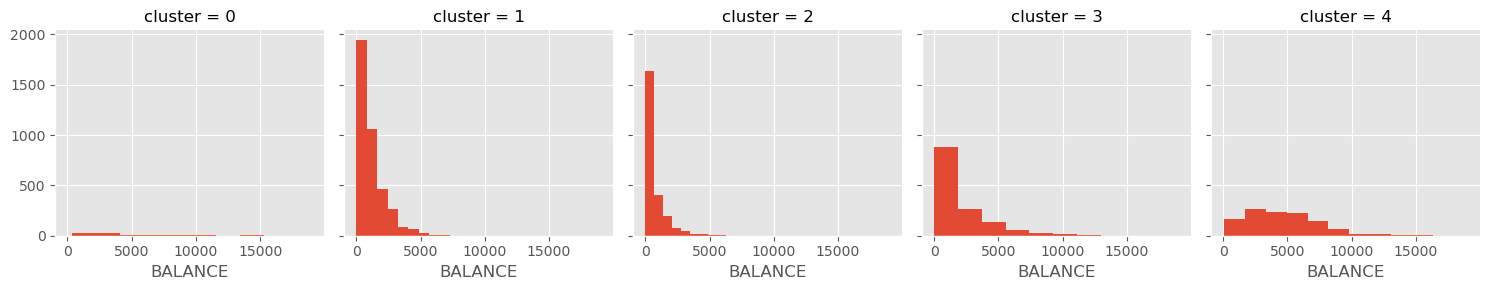

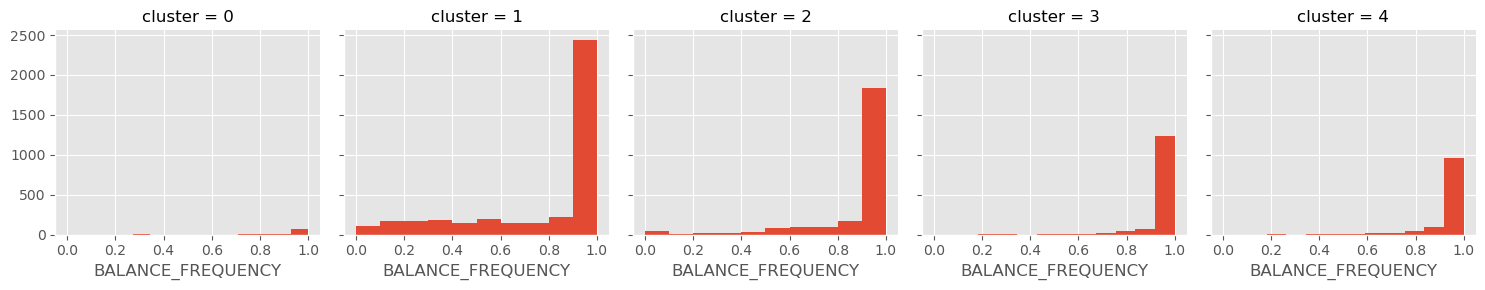

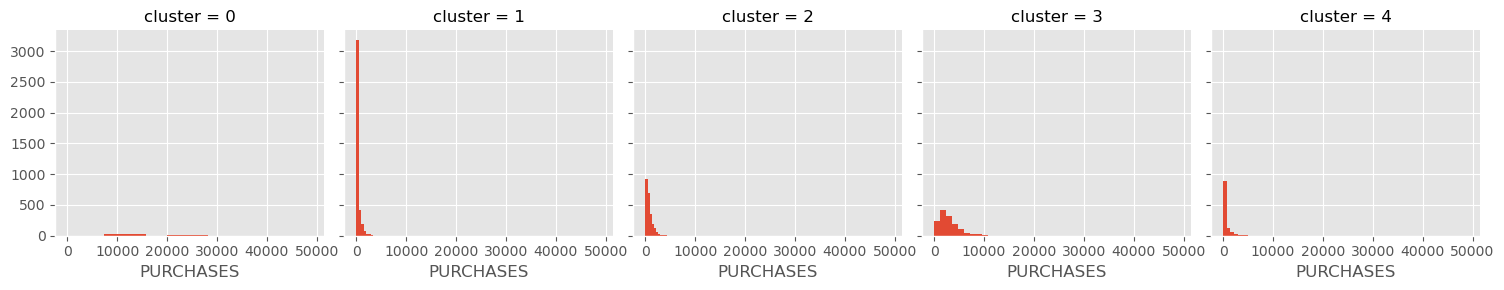

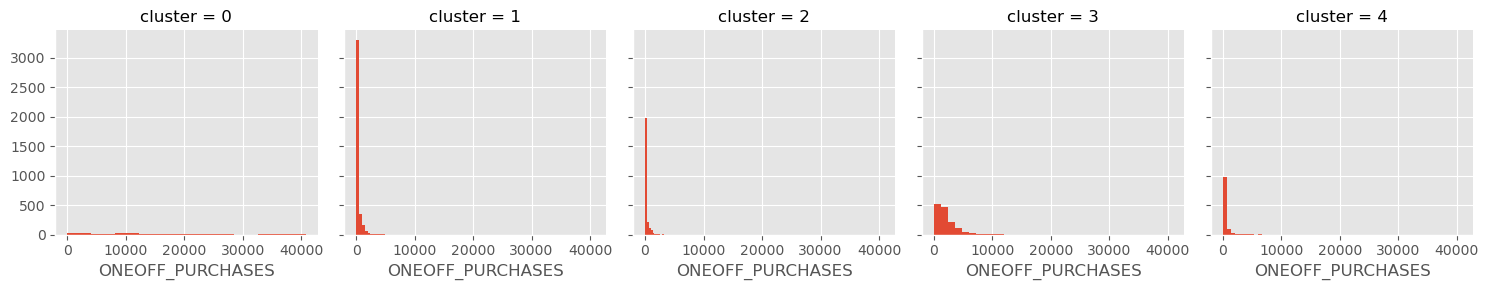

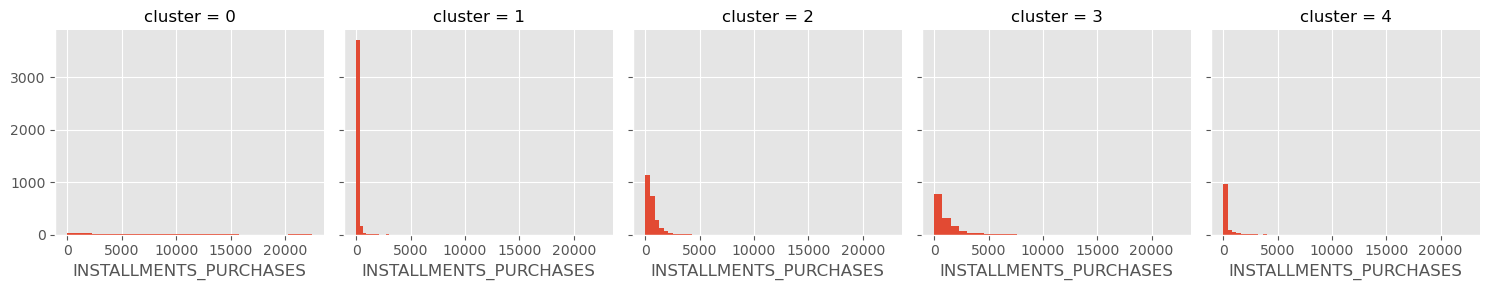

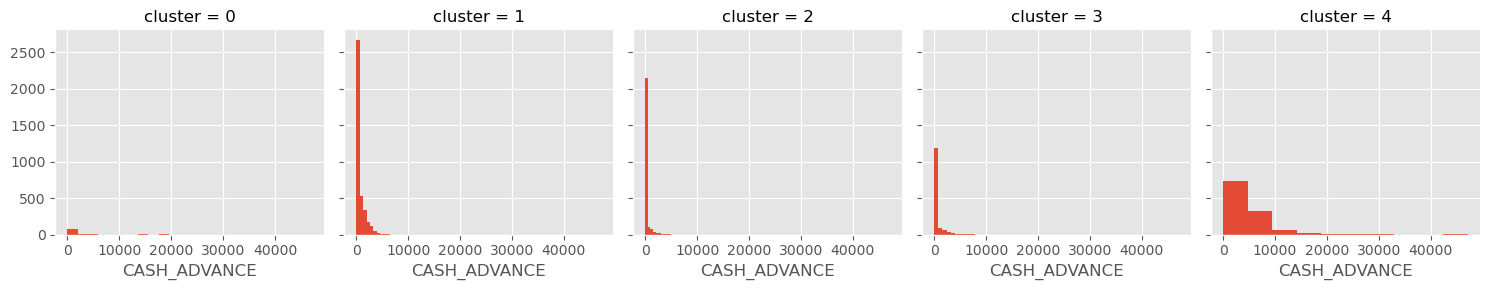

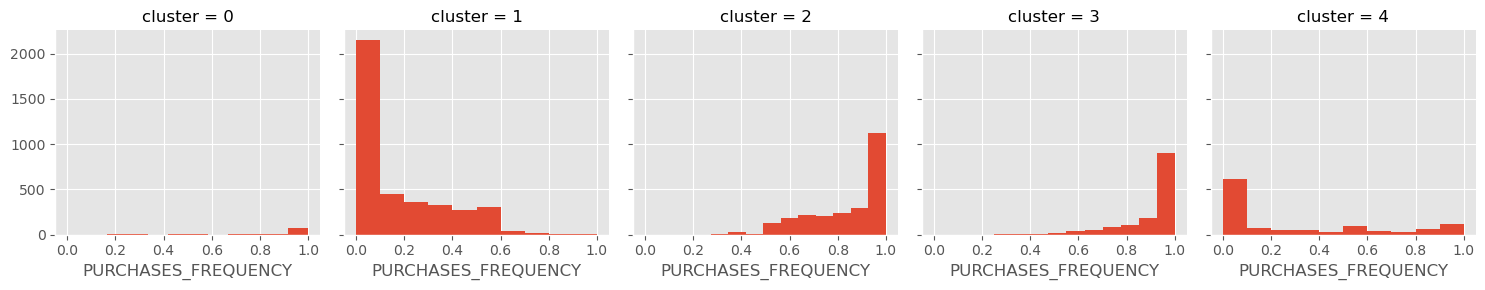

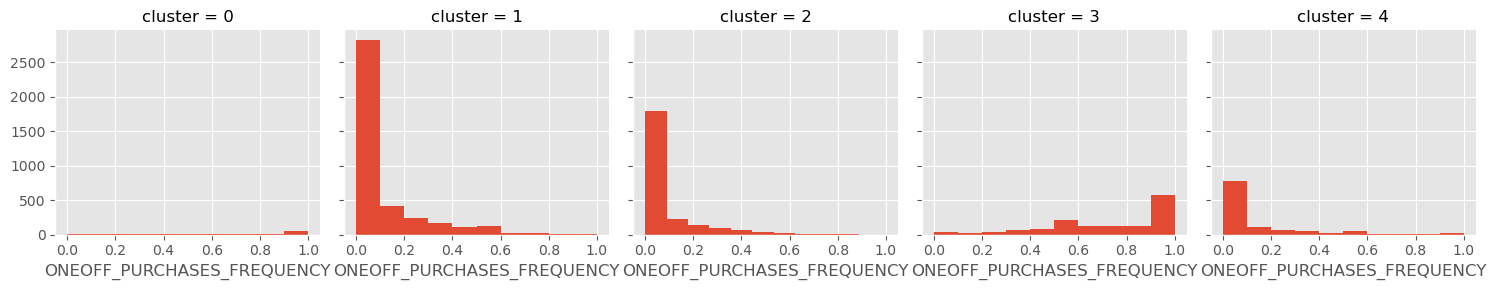

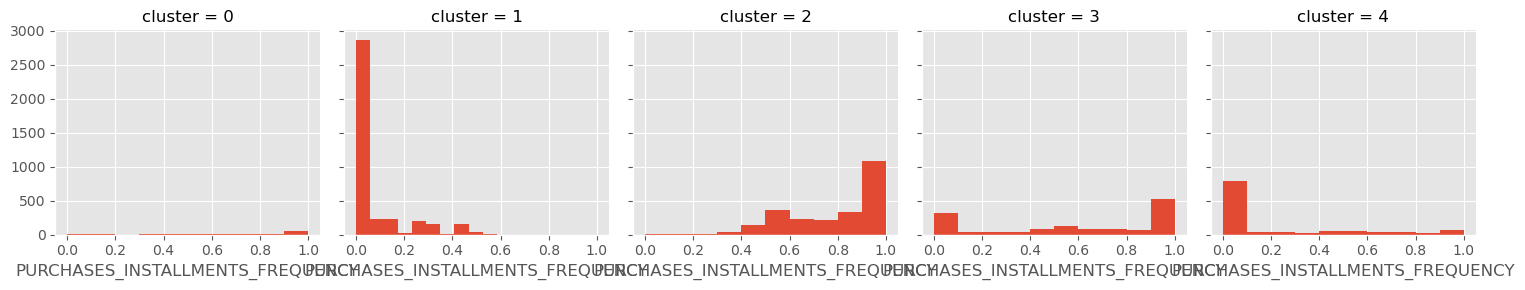

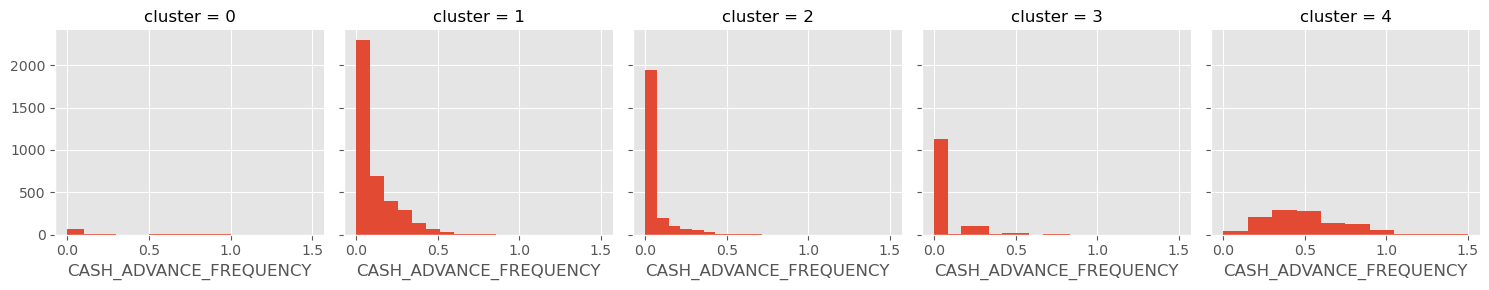

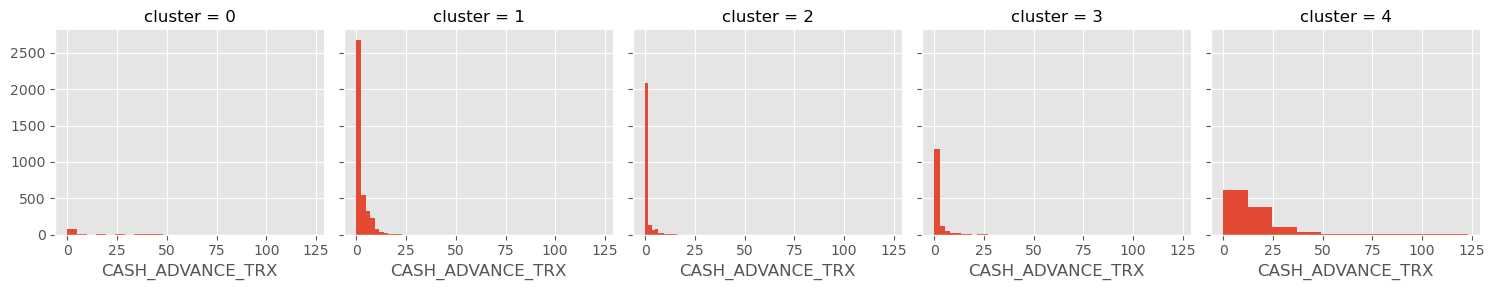

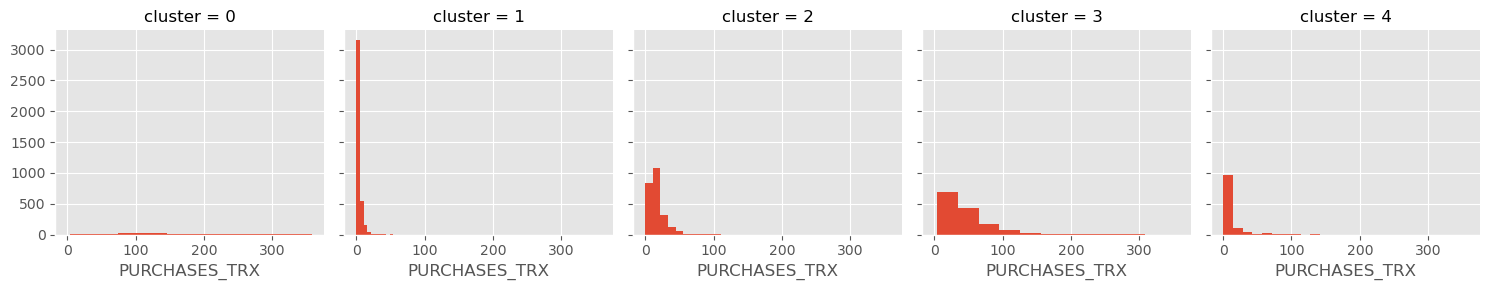

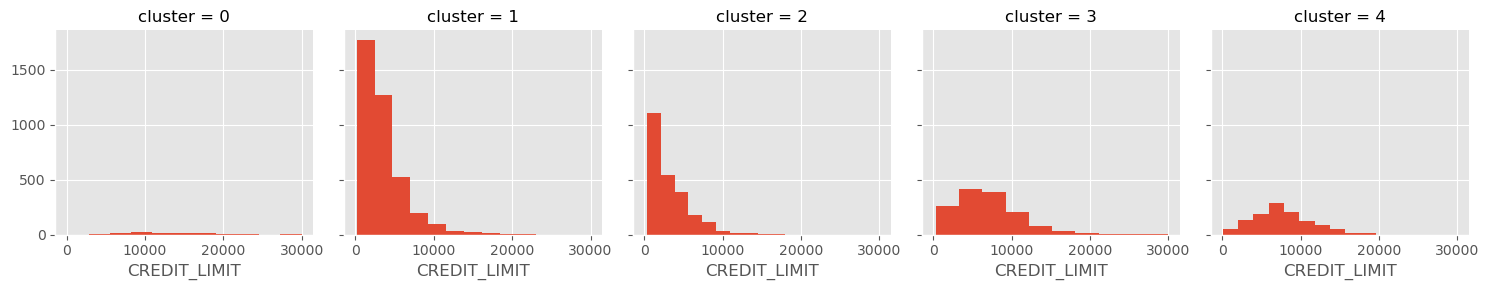

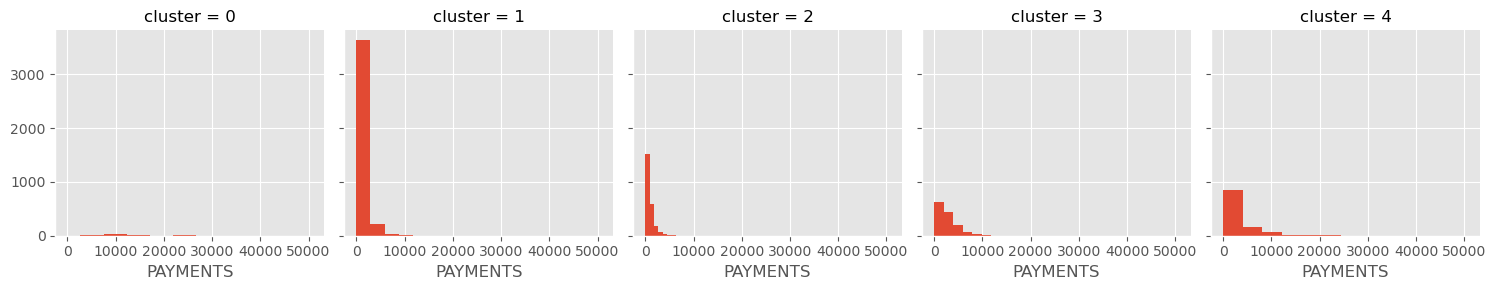

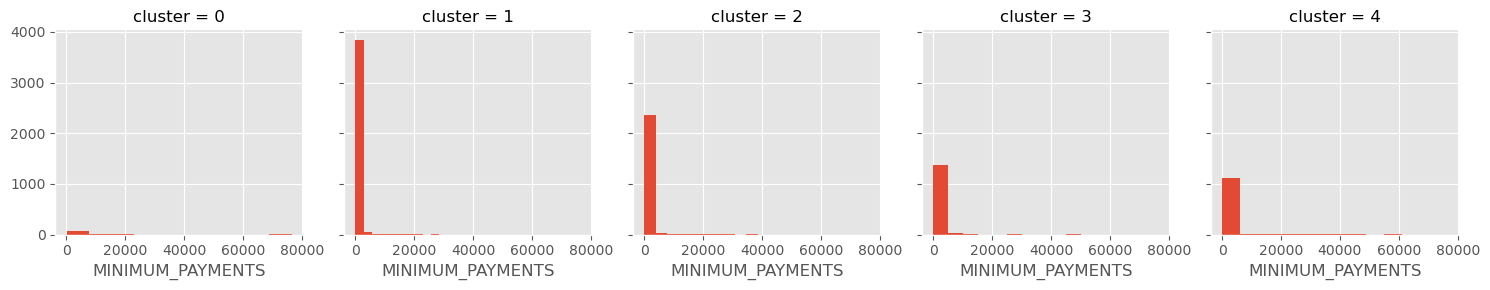

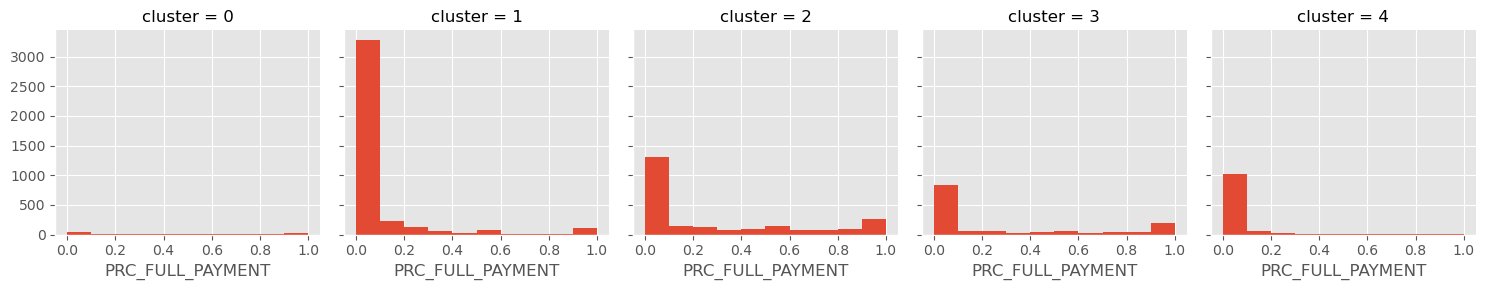

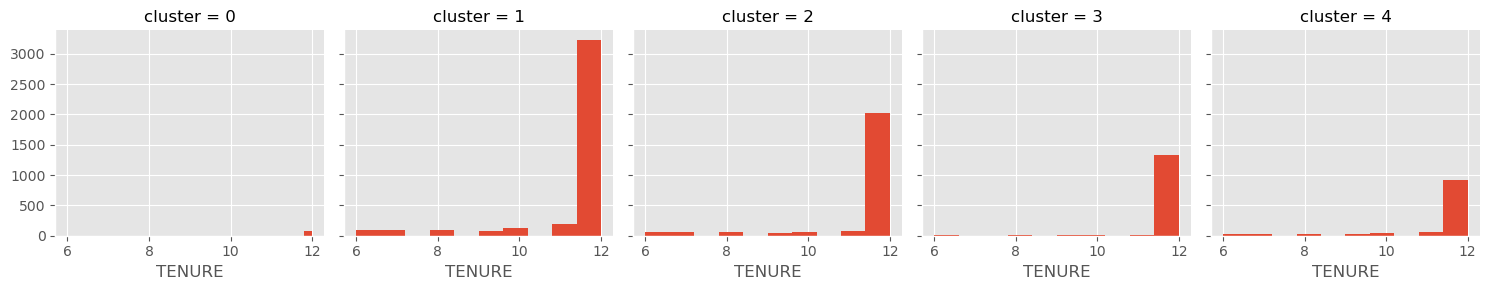

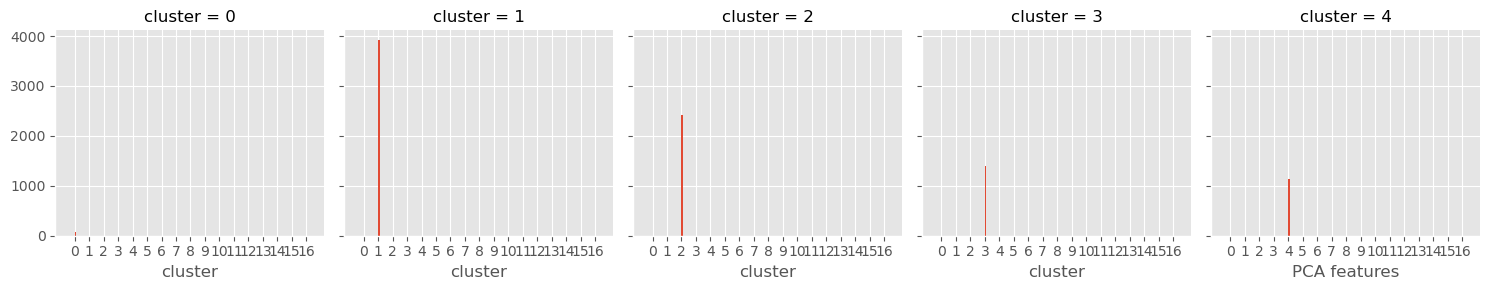

In [34]:
# Plot untuk menentukan kompenen yang mengandung varians dari data
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color="#8DC3A7")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

Berdasarkan plot di atas, menunjukkan bahwa 2 komponen pertama adalah sebagian besar varians dari data. 

Untuk mendukung pertanyaan ini, akan dibuat modul PCA dengan `n_components` = 0.95. Ini akan membantu pemilihan jumlah komponen sambil mempertahankan 95% variabilitas dalam data, atau dapat juga mendukung pernyataan sebelumnya, apakah 2 kompenen mengandung sebagian besar variabilitas dari data.

In [35]:
pca095 = PCA(n_components=0.95)
principal_component095 = pca095.fit_transform(X)
principal_component095

array([[-1.68364879e+00, -1.07224148e+00,  4.75660084e-01, ...,
        -7.81956004e-02, -2.35948299e-01, -5.24972248e-02],
       [-1.13408493e+00,  2.50914981e+00,  6.02216308e-01, ...,
        -7.77929470e-01, -8.70746073e-01, -6.07171068e-01],
       [ 9.69394988e-01, -3.83576903e-01,  9.09697616e-02, ...,
        -1.74404835e-03, -7.62170193e-01,  6.83869942e-01],
       ...,
       [-9.28985122e-01, -1.80804835e+00, -4.58242377e-01, ...,
        -8.30135631e-01,  1.20175848e-01,  7.31414169e-02],
       [-2.33784475e+00, -6.53611332e-01,  9.82831153e-01, ...,
         2.68662638e-01, -3.06599164e-01, -1.13268706e-01],
       [-5.58026533e-01, -4.00646098e-01,  1.03364560e+00, ...,
         3.46160674e-01, -5.05323873e-01,  1.22672594e-01]])

In [36]:
# Membuat dataframe dari kompenen utama yang sudah dibuat
cols = ["Principal Component "+str(i) for i in range(principal_component095.shape[1])]
df_pca_component095 = pd.DataFrame(data = principal_component095, columns = cols)
df_pca_component095.head()

,Principal Component 0,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336,-0.078196,-0.235948,-0.052497
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472,-0.777929,-0.870746,-0.607171
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803,-0.001744,-0.762170,0.683870
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245,0.393690,0.747670,0.119186
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032,-0.122073,-0.455167,-0.108719


Setelah didapatkannya *principal components*, kita dapat menemukan *explained_variance_ratio*. Hal ini akan memberi informasi mengenai jumlah varians yang dimiliki setiap principal component setelah memproyeksikan data ke subruang dimensi yang lebih rendah.

In [37]:
print("Explained variation per principal component: {}".format(pca095.explained_variance_ratio_))

Explained variation per principal component: [0.27297671 0.2031378  0.08813182 0.07479524 0.06224729 0.05740056
 0.04883426 0.04299203 0.03798259 0.03080002 0.02372251 0.0177337 ]


Berdasarkan hasil di atas, dapat diamati bahwa Principal Component 1 menampung 27,2% informasi dan Principal Component 2 menampung 20,3% informasi. Dengan begitu, 52,5% informasi hilang pada saat memproyeksikan data 17 dimensi menjadi data dua dimensi. Selanjutnya akan dibuat model PCA baru dengan jumlah kompenen sebanyak 2.

In [38]:
pca2 = PCA(n_components=2)
principal_comp = pca2.fit_transform(X)
principal_comp

array([[-1.68365107, -1.07223504],
       [-1.13409051,  2.50916316],
       [ 0.96940156, -0.38361183],
       ...,
       [-0.92898545, -1.80804622],
       [-2.33784573, -0.65360046],
       [-0.5580205 , -0.40066347]])

In [39]:
# Membuat dataframe
df_pca2 = pd.DataFrame(data = principal_comp, columns = ["Principal Component 1", "Principal Component 2"])
df_pca2.head()

,Principal Component 1,Principal Component 2
0,-1.683651,-1.072235
1,-1.134091,2.509163
2,0.969402,-0.383612
3,-0.888225,0.004662
4,-1.600022,-0.683793


In [40]:
# Menambahkan kolom klaster

df_pca2['Cluster'] = labels
df_pca2.head()

,Principal Component 1,Principal Component 2,Cluster
0,-1.683651,-1.072235,1
1,-1.134091,2.509163,4
2,0.969402,-0.383612,3
3,-0.888225,0.004662,1
4,-1.600022,-0.683793,1


Selanjutnya, melakukan visualisasi dari 8950 sampel di sepanjang sumbu principal component 1 dan principal component 2. Hal ini akan memberikan wawasan mengenai sampel yang didistribusikan diantara dua kelas.

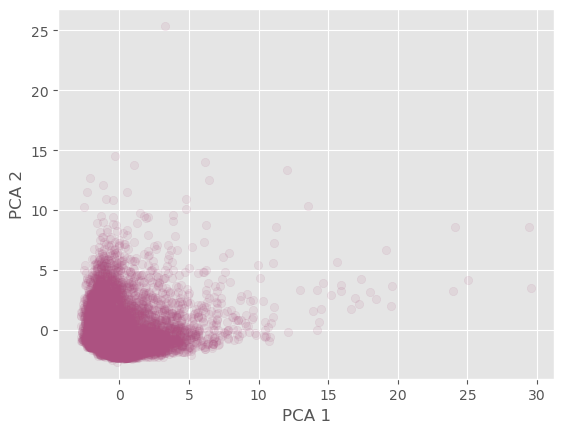

In [41]:
plt.scatter(df_pca2["Principal Component 1"],
            df_pca2["Principal Component 2"],
            alpha=.1, color="#AC5281")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

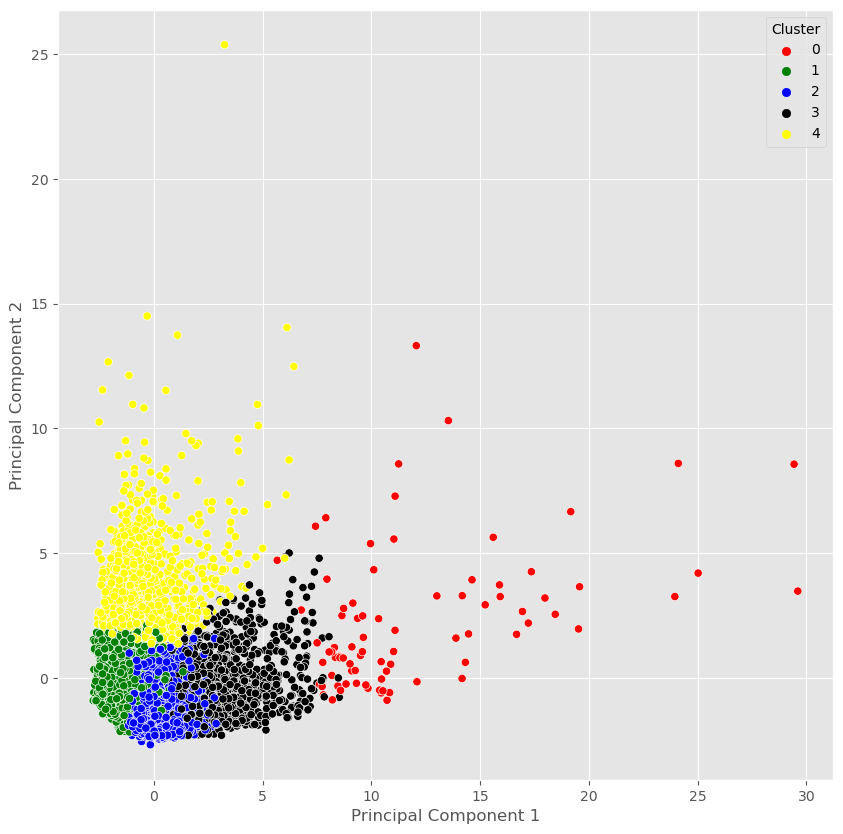

In [42]:
# Membuat visualisasi klaster
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue = "Cluster", data = df_pca2, palette =['red','green','blue','black','yellow'])
plt.show()

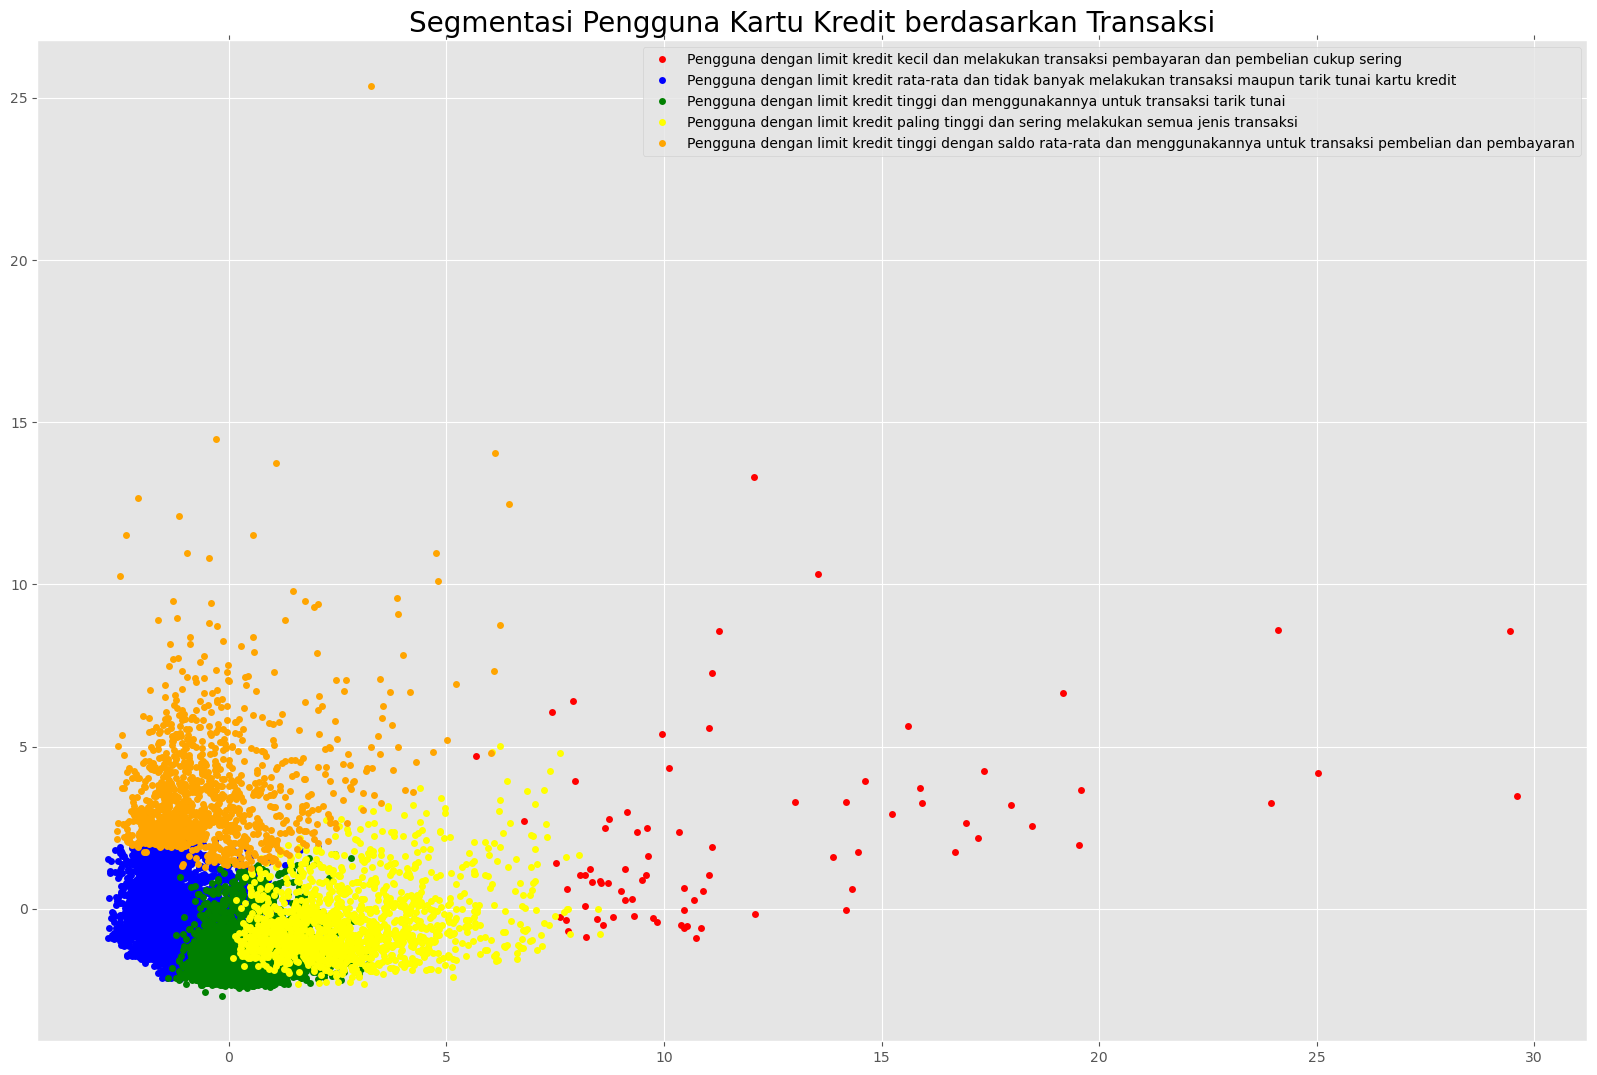

In [43]:
colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange'
         }

names = {0: 'Pengguna dengan limit kredit kecil dan melakukan transaksi pembayaran dan pembelian cukup sering', 
         1: 'Pengguna dengan limit kredit rata-rata dan tidak banyak melakukan transaksi maupun tarik tunai kartu kredit', 
         2: 'Pengguna dengan limit kredit tinggi dan menggunakannya untuk transaksi tarik tunai', 
         3: 'Pengguna dengan limit kredit paling tinggi dan sering melakukan semua jenis transaksi', 
         4: 'Pengguna dengan limit kredit tinggi dengan saldo rata-rata dan menggunakannya untuk transaksi pembelian dan pembayaran'
        }

df_ = pd.DataFrame({'x':df_pca2["Principal Component 1"], 'y':df_pca2["Principal Component 2"], 'label':labels}) 
groups = df_.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Segmentasi Pengguna Kartu Kredit berdasarkan Transaksi", fontsize=20)
plt.show()

# Model Inference

Untuk menguji keakuratan model, dilakukan model inference untuk menguji model dengan data di luar data yang tersedia.

In [44]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Misal terdapat pengguna kartu kredit dengan catatan transaksi sebagai berikut:

BALANCE : 1320

BALANCE_FREQUENCY : 0.60

PURCHASES : 450

ONEOFF_PURCHASES : 450

INSTALLMENTS_PURCHASES = 50

CASH_ADVANCE = 100

PURCHASES_FREQUENCY = 0.5

ONEOFF_PURCHASES = 0.5

INSTALLMENTS_PURCHASES_FREQUENCY = 0.3

CASH_ADVANCE_FREQUENCY = 0.5

CASH_ADVANCE_TRX = 5

PURCHASES_TRX = 10

CREDIT_LIMIT = 3500

PAYMENTS = 1000

MINIMUM_PAYMENTS = 100

PRC_FULL_PAYMENT = 0.02

TENURE = 12

Pengguna ini akan termasuk dalam kelompok klaster berapa?

In [45]:
balance = float(input('Balance:'))
balance_frq = float(input('Balance Frequency:'))
purchases = float(input('Purchases Amount:'))
oneoff_purchases = float(input('ONEOFF Purchases Amount:'))
installment_purchases = float(input('Installment Purchases Amount:'))
cash_advance = float(input('Cash Advance Amount:'))
purchases_frq = float(input('Purchases Frequency:'))
oneoff_purchases_frq = float(input('ONEOFF Purchases Frequency:'))
installment_purchases_frq = float(input('Installment Purchases Frequency:'))
cash_advance_frq = float(input('Cash Advance Frequency:'))
cash_advance_trx = float(input('Number of Cash Advance Transaction:'))
purchases_trx = float(input('Number of Purchases Transaction:'))
credit_limit = float(input('Credit Limit Amount:'))
payments = float(input('Payment Amount:'))
minimum_payments = float(input('Minimum Payments Amount:'))
prc_full_payments = float(input('Percentage of Full Payments:'))
tenure = float(input('Tenure:'))

val = [balance, balance_frq, purchases, oneoff_purchases, installment_purchases, 
       cash_advance, purchases_frq, oneoff_purchases_frq, installment_purchases_frq,
       cash_advance_frq, cash_advance_trx,
      purchases_trx, credit_limit, payments, minimum_payments, prc_full_payments, tenure]
val = scaler.transform([val])

print('Input values:', val)

val_predict = kmeans.predict(val)

if val_predict == 0:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit kecil dan melakukan transaksi pembayaran dan pembelian cukup sering'.format(val_predict))
elif val_predict == 1:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit rata-rata dan tidak banyak melakukan transaksi maupun tarik tunai kartu kredit'.format(val_predict))
elif val_predict == 2:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit tinggi dan menggunakannya untuk transaksi tarik tunai'.format(val_predict))
elif val_predict == 3:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit paling tinggi dan sering melakukan transaksi baik itu pembelian dan pembayaran ataupun tarik tunai'.format(val_predict))
elif val_predict == 4:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit tinggi dengan saldo rata-rata dan menggunakannya untuk transaksi pembelian dan pembayaran'.format(val_predict))
else:
    print('Pengguna tidak termasuk dalam klaster manapun')

Balance:300
Balance Frequency:0.82
Purchases Amount:800
ONEOFF Purchases Amount:800
Installment Purchases Amount:250
Cash Advance Amount:500
Purchases Frequency:0.8
ONEOFF Purchases Frequency:0.8
Installment Purchases Frequency:0.7
Cash Advance Frequency:0.6
Number of Cash Advance Transaction:24
Number of Purchases Transaction:36
Credit Limit Amount:6400
Payment Amount:3100
Minimum Payments Amount:500
Percentage of Full Payments:0.38
Tenure:12
Input values: [[-0.60750714 -0.24176006 -0.0951104   0.12505316 -0.17811551 -0.228355
   0.77152297  2.0030287   0.84434088  2.32299893  3.0407922   0.8565314
   0.52377275  0.47215973 -0.14785973  0.77367048  0.36067954]]
Pengguna termasuk ke dalam klaster [3], dengan karakteristik
Pengguna dengan limit kredit paling tinggi dan sering melakukan transaksi baik itu pembelian dan pembayaran ataupun tarik tunai


---
Misal terdapat pengguna kartu kredit dengan catatan transaksi sebagai berikut:

BALANCE : 3000

BALANCE_FREQUENCY : 0.82

PURCHASES : 800

ONEOFF_PURCHASES : 800

INSTALLMENTS_PURCHASES = 250

CASH_ADVANCE = 500

PURCHASES_FREQUENCY = 0.8

ONEOFF_PURCHASES = 0.8

INSTALLMENTS_PURCHASES_FREQUENCY = 0.7

CASH_ADVANCE_FREQUENCY = 0.6

CASH_ADVANCE_TRX = 24

PURCHASES_TRX = 36

CREDIT_LIMIT = 6400

PAYMENTS = 3100

MINIMUM_PAYMENTS = 500

PRC_FULL_PAYMENT = 0.38

TENURE = 12

Pengguna ini akan termasuk dalam kelompok klaster berapa?

In [46]:
balance = float(input('Balance:'))
balance_frq = float(input('Balance Frequency:'))
purchases = float(input('Purchases Amount:'))
oneoff_purchases = float(input('ONEOFF Purchases Amount:'))
installment_purchases = float(input('Installment Purchases Amount:'))
cash_advance = float(input('Cash Advance Amount:'))
purchases_frq = float(input('Purchases Frequency:'))
oneoff_purchases_frq = float(input('ONEOFF Purchases Frequency:'))
installment_purchases_frq = float(input('Installment Purchases Frequency:'))
cash_advance_frq = float(input('Cash Advance Frequency:'))
cash_advance_trx = float(input('Number of Cash Advance Transaction:'))
purchases_trx = float(input('Number of Purchases Transaction:'))
credit_limit = float(input('Credit Limit Amount:'))
payments = float(input('Payment Amount:'))
minimum_payments = float(input('Minimum Payments Amount:'))
prc_full_payments = float(input('Percentage of Full Payments:'))
tenure = float(input('Tenure:'))

val = [balance, balance_frq, purchases, oneoff_purchases, installment_purchases, 
       cash_advance, purchases_frq, oneoff_purchases_frq, installment_purchases_frq,
       cash_advance_frq, cash_advance_trx,
      purchases_trx, credit_limit, payments, minimum_payments, prc_full_payments, tenure]
val = scaler.transform([val])

print('Input values:', val)

val_predict = kmeans.predict(val)

if val_predict == 0:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit kecil dan melakukan transaksi pembayaran dan pembelian cukup sering'.format(val_predict))
elif val_predict == 1:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit rata-rata dan tidak banyak melakukan transaksi maupun tarik tunai kartu kredit'.format(val_predict))
elif val_predict == 2:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit tinggi dan menggunakannya untuk transaksi tarik tunai'.format(val_predict))
elif val_predict == 3:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit paling tinggi dan sering melakukan transaksi baik itu pembelian dan pembayaran ataupun tarik tunai'.format(val_predict))
elif val_predict == 4:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit tinggi dengan saldo rata-rata dan menggunakannya untuk transaksi pembelian dan pembayaran'.format(val_predict))
else:
    print('Pengguna tidak termasuk dalam klaster manapun')

Balance:


ValueError: could not convert string to float: ''

# Conclusion

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:

1. Project ini membahas tentang penerapan algoritma Unsupervised Learning, yaitu Clustering. Metode Clustering yang akan digunakan adalah Principal Component Analysis (PCA) dan K-Means Clustering. Data yang digunakan dalam analisis klaster ini adalah data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut dan 8950 baris. Objektif dari project ini adalah mengelompokkan pengguna kartu kredit berdasarkan kebiasaan transaksi (transaction behaviour) yang dijalankannya ke dalam beberapa klaster.
2. Menggunakan K-means Clustering , pengelompokkan dibagi menjadi 5 klaster dengan karakteristik sebagai berikut:
- Klaster 0 : Pengguna dengan limit kredit kecil dan melakukan transaksi pembayaran dan pembelian cukup sering)

- Klaster 1 : Pengguna dengan limit kredit rata-rata dan tidak banyak melakukan transaksi maupun tarik tunai kartu kredit).

- Klaster 2 : Pengguna dengan limit kredit tinggi dan menggunakannya untuk transaksi tarik tunai)

- Klaster 3 : Pengguna dengan limit kredit paling tinggi dan sering melakukan transaksi baik itu pembelian dan pembayaran ataupun tarik tunai)

- Klaster 4 : Pengguna dengan limit kredit tinggi dengan saldo rata-rata dan menggunakannya untuk transaksi pembelian dan pembayaran)
3. Dengan visualisasi menggunakan modul PCA menghasilkan 2 kompenen utama yang menampung 47,5% variansi dari data.

# Save Model

Pada tahap menyimpan serta membaca data ke dalam/dari sebuah file dapat digunakannya sebuah modul pickle.

In [ ]:
pickle_file_dir = open("kmeans_model.pkl", "wb")

pickle.dump(kmeans, pickle_file_dir)
pickle_file_dir.close()

In [ ]:
pickle_file_dir = open("regression.pkl", "wb")

pickle.dump(scaler, pickle_file_dir)
pickle_file_dir.close()